# Project Description

# Overview

Introduction:

This capstone project aims to analyze a Avocado datset which contains retail scan data of avocado to predict the region and average price of Hass avocados.

Avocados are popularly known for their nutitional values and the culinary versatility. 
Here understanding the factors which influence avocado prices and the regional distribution of avocado sales can provide valuable insights for various stakeholders in the avocado industry, including growers, distributors, and retailers.

Dataset Context:

The dataset used here was downloaded from the Hass Avocado Board website. It includes weekly retail scan data for the year 2018, covering national retail volumn(units) and price of Hass avocados. This dataset also represents an expanded, multi-outlet retail dataset, which includes grocery, maa, club, drug, dollar, and military channels.


There are two main objectives of this dataset which include:

* Classification task: Predicting The Region
1. Here we will be developing a classification model for the prediction of region based on given features.
2. Will be identifying the relevant and key features which will contribute to the prediction.
3. Lastly, will be analyzing the model's performance and evaluate its accuracy in predicting the region.

* Regression task: Predicting the Average price
1. Here also we will be developing a regression model for the prediction of avaerage price.
2. Will be determining the most and less influential features.
3. Will be evaluating the regression model's performance and assess its ability to accurately predict average prices.


Let's start with importing some necessary libraries to process the task.


# Importing necessary libraries

In [1]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import pandas as pd

# Importing Dataset

Dataset Description:

The dataset which is used in this project to perform the tasks can be accessed from the following link:https://github.com/dsrscientist/Data-Science-ML-Capstone-Projects/blob/master/avocado.csv.zip

It is stored in a CSV (Comma-Separated Values) format, which is basically a common and widely used format for tabular data. CSV files can be easily imported to the various data analysis tools and programming languages for further analysis and modeling.

Columns Description:

The dataset contains several relevant columns such as Unnamed no., Date, AveragePrice, type (conventional or organic), year, Region, Total Volume, and specific PLU(Product's LookUp) codes for different types of avocados. 

The Date column represents the observation date, AveragePrice denotes the average price of a single avocado, and Region represents the city or region of the observation. The Total Volume column represents the total number of avocados sold, while the PLU columns (4046, 4225, 4770) represent the total number of avocados sold for specific PLU codes.

Basically dataset will have 14 columns in which 13 will be feature and 1 will be target.
For classification task as we have to predict the region so it will be target variable and rest will be independent variable, while for regression task we have to predict the average price so it will be target and rest will be independent variable or features.

Here we will be dropping irrelevant column or adding some relevant column to dataset which helps in prediction. As we will be extracting new features from the date column which may be more relevant and sorted, rest we will be handling at feature engineering

In [2]:
df= pd.read_csv("avocado.csv")
df

Unnamed: 0        Date  AveragePrice  Total Volume     4046       4225  \
0               0  2015-12-27          1.33      64236.62  1036.74   54454.85   
1               1  2015-12-20          1.35      54876.98   674.28   44638.81   
2               2  2015-12-13          0.93     118220.22   794.70  109149.67   
3               3  2015-12-06          1.08      78992.15  1132.00   71976.41   
4               4  2015-11-29          1.28      51039.60   941.48   43838.39   
...           ...         ...           ...           ...      ...        ...   
18244           7  2018-02-04          1.63      17074.83  2046.96    1529.20   
18245           8  2018-01-28          1.71      13888.04  1191.70    3431.50   
18246           9  2018-01-21          1.87      13766.76  1191.92    2452.79   
18247          10  2018-01-14          1.93      16205.22  1527.63    2981.04   
18248          11  2018-01-07          1.62      17489.58  2894.77    2356.13   

         4770  Total Bags  Small Bags  Large Bags  XLarge Bags          type  \
0       48.16     8696.87     8603.62       93.25          0.0  conventional   
1       58.33     9505.56     9408.07       97.49          0.0  conventional   
2      130.50     8145.35     8042.21      103.14          0.0  conventional   
3       72.58     5811.16     5677.40      133.76          0.0  conventional   
4       75.78     6183.95     5986.26      197.69          0.0  conventional   
...       ...         ...         ...         ...          ...           ...   
18244    0.00    13498.67    13066.82      431.85          0.0       organic   
18245    0.00     9264.84     8940.04      324.80          0.0       organic   
18246  727.94     9394.11     9351.80       42.31          0.0       organic   
18247  727.01    10969.54    10919.54       50.00          0.0       organic   
18248  224.53    12014.15    11988.14       26.01          0.0       organic   

       year            region  
0      2015            Albany  
1      2015            Albany  
2      2015            Albany  
3      2015            Albany  
4      2015            Albany  
...     ...               ...  
18244  2018  WestTexNewMexico  
18245  2018  WestTexNewMexico  
18246  2018  WestTexNewMexico  
18247  2018  WestTexNewMexico  
18248  2018  WestTexNewMexico  

[18249 rows x 14 columns]

In [3]:
df = df.drop(['Unnamed: 0', 'Date'], axis=1)
df

AveragePrice  Total Volume     4046       4225    4770  Total Bags  \
0              1.33      64236.62  1036.74   54454.85   48.16     8696.87   
1              1.35      54876.98   674.28   44638.81   58.33     9505.56   
2              0.93     118220.22   794.70  109149.67  130.50     8145.35   
3              1.08      78992.15  1132.00   71976.41   72.58     5811.16   
4              1.28      51039.60   941.48   43838.39   75.78     6183.95   
...             ...           ...      ...        ...     ...         ...   
18244          1.63      17074.83  2046.96    1529.20    0.00    13498.67   
18245          1.71      13888.04  1191.70    3431.50    0.00     9264.84   
18246          1.87      13766.76  1191.92    2452.79  727.94     9394.11   
18247          1.93      16205.22  1527.63    2981.04  727.01    10969.54   
18248          1.62      17489.58  2894.77    2356.13  224.53    12014.15   

       Small Bags  Large Bags  XLarge Bags          type  year  \
0         8603.62       93.25          0.0  conventional  2015   
1         9408.07       97.49          0.0  conventional  2015   
2         8042.21      103.14          0.0  conventional  2015   
3         5677.40      133.76          0.0  conventional  2015   
4         5986.26      197.69          0.0  conventional  2015   
...           ...         ...          ...           ...   ...   
18244    13066.82      431.85          0.0       organic  2018   
18245     8940.04      324.80          0.0       organic  2018   
18246     9351.80       42.31          0.0       organic  2018   
18247    10919.54       50.00          0.0       organic  2018   
18248    11988.14       26.01          0.0       organic  2018   

                 region  
0                Albany  
1                Albany  
2                Albany  
3                Albany  
4                Albany  
...                 ...  
18244  WestTexNewMexico  
18245  WestTexNewMexico  
18246  WestTexNewMexico  
18247  WestTexNewMexico  
18248  WestTexNewMexico  

[18249 rows x 12 columns]

In [4]:
df.head()

AveragePrice  Total Volume     4046       4225    4770  Total Bags  \
0          1.33      64236.62  1036.74   54454.85   48.16     8696.87   
1          1.35      54876.98   674.28   44638.81   58.33     9505.56   
2          0.93     118220.22   794.70  109149.67  130.50     8145.35   
3          1.08      78992.15  1132.00   71976.41   72.58     5811.16   
4          1.28      51039.60   941.48   43838.39   75.78     6183.95   

   Small Bags  Large Bags  XLarge Bags          type  year  region  
0     8603.62       93.25          0.0  conventional  2015  Albany  
1     9408.07       97.49          0.0  conventional  2015  Albany  
2     8042.21      103.14          0.0  conventional  2015  Albany  
3     5677.40      133.76          0.0  conventional  2015  Albany  
4     5986.26      197.69          0.0  conventional  2015  Albany

In [5]:
df.tail()

AveragePrice  Total Volume     4046     4225    4770  Total Bags  \
18244          1.63      17074.83  2046.96  1529.20    0.00    13498.67   
18245          1.71      13888.04  1191.70  3431.50    0.00     9264.84   
18246          1.87      13766.76  1191.92  2452.79  727.94     9394.11   
18247          1.93      16205.22  1527.63  2981.04  727.01    10969.54   
18248          1.62      17489.58  2894.77  2356.13  224.53    12014.15   

       Small Bags  Large Bags  XLarge Bags     type  year            region  
18244    13066.82      431.85          0.0  organic  2018  WestTexNewMexico  
18245     8940.04      324.80          0.0  organic  2018  WestTexNewMexico  
18246     9351.80       42.31          0.0  organic  2018  WestTexNewMexico  
18247    10919.54       50.00          0.0  organic  2018  WestTexNewMexico  
18248    11988.14       26.01          0.0  organic  2018  WestTexNewMexico

# Exploratory Data Analysis (EDA)

It is an approach to analyze the datasets, and summarize their characteristics. Here we are analyzing dataset by first checking with the dimensions of the dataset, then checking for the null values present in the dataset, followed by the memory usage detail by using info() function, checking with value counts and unique values present in dataset, followed by statistical summary of dataset(numerical column), which ends with graphical analysis.

Let's start with checking the dimension of the dataset using df.shape attribute, then we will be seeing df.columns and df.dtypes attributes to check the columns and their datatypes, which will be followed by isnull().sum() function which will check the missing data present in each column of the dataset. We will also visualize the null values using heatmap to clear the confusion. And then we will be describing the statistical summary by using df.describe() function.

In [6]:
# Let's check dimension of dataset first

df.shape

(18249, 12)

In [7]:
df.columns

Index(['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year', 'region'],
      dtype='object')

In [8]:
df.dtypes

AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

Here we can see there is three different types of datatypes in the dataset i.e., float64(9), int64(1), and object(2)

In [9]:
# Let's check the missing values if present in any column

df.isnull().sum()

AveragePrice    0
Total Volume    0
4046            0
4225            0
4770            0
Total Bags      0
Small Bags      0
Large Bags      0
XLarge Bags     0
type            0
year            0
region          0
dtype: int64

<Axes: >

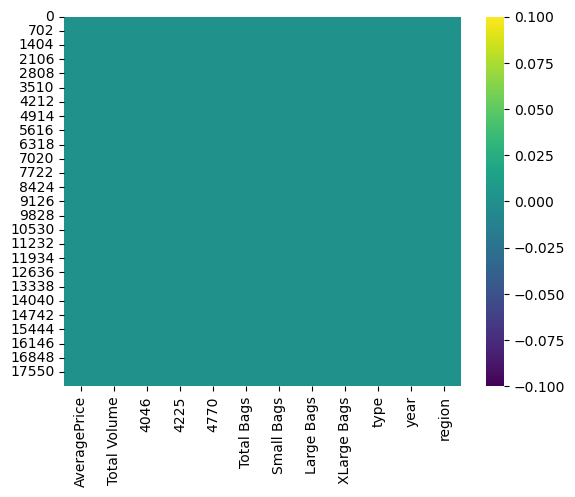

In [10]:
# let's visualize missing values using heatmap
sns.heatmap(df.isnull(), cmap = 'viridis')

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  18249 non-null  float64
 1   Total Volume  18249 non-null  float64
 2   4046          18249 non-null  float64
 3   4225          18249 non-null  float64
 4   4770          18249 non-null  float64
 5   Total Bags    18249 non-null  float64
 6   Small Bags    18249 non-null  float64
 7   Large Bags    18249 non-null  float64
 8   XLarge Bags   18249 non-null  float64
 9   type          18249 non-null  object 
 10  year          18249 non-null  int64  
 11  region        18249 non-null  object 
dtypes: float64(9), int64(1), object(2)
memory usage: 1.7+ MB


Let's check value counts and unique values in the dataset

In [12]:
# Let's looping through each column to get value counts

for col in df.columns:
    print("Value counts for{col}:")
    print(df[col].value_counts())

Value counts for{col}:
1.15    202
1.18    199
1.08    194
1.26    193
1.13    192
       ... 
3.25      1
3.12      1
2.68      1
3.03      1
3.17      1
Name: AveragePrice, Length: 259, dtype: int64
Value counts for{col}:
4103.97       2
3529.44       2
46602.16      2
13234.04      2
3713.49       2
             ..
874349.55     1
1621253.97    1
830499.38     1
845065.66     1
17489.58      1
Name: Total Volume, Length: 18237, dtype: int64
Value counts for{col}:
0.00       242
3.00        10
4.00         8
1.24         8
1.00         8
          ... 
1486.31      1
1761.80      1
1772.26      1
1803.39      1
2894.77      1
Name: 4046, Length: 17702, dtype: int64
Value counts for{col}:
0.00         61
177.87        3
215.36        3
1.30          3
1.26          3
             ..
417905.67     1
275986.91     1
277789.30     1
378155.00     1
2356.13       1
Name: 4225, Length: 18103, dtype: int64
Value counts for{col}:
0.00      5497
2.66         7
3.32         7
10.97        6
1.

In [13]:
# loop through each column and print unique values
for col in df.columns:
    print("Unique values in {col}:")
    print(df[col].unique())

Unique values in {col}:
[1.33 1.35 0.93 1.08 1.28 1.26 0.99 0.98 1.02 1.07 1.12 1.31 1.11 1.34
 1.45 1.05 1.37 1.27 1.32 1.23 1.19 1.43 1.2  1.22 1.13 1.16 1.06 1.17
 1.24 0.96 1.   1.09 0.95 0.97 1.15 1.01 1.14 1.1  1.04 1.03 1.18 1.29
 1.25 0.71 0.94 0.91 1.39 1.4  1.36 1.3  1.54 1.59 1.56 1.38 1.49 1.5
 1.47 1.42 1.41 1.44 1.52 0.9  0.87 0.78 0.92 0.83 0.88 0.84 0.85 1.21
 0.79 0.89 0.86 0.8  0.82 0.74 0.81 0.77 0.75 0.65 0.73 0.68 0.72 0.67
 0.76 0.62 0.7  0.66 1.46 0.49 0.53 0.56 0.6  0.58 0.54 0.52 0.51 0.57
 0.63 0.64 0.61 1.48 1.55 1.58 1.53 1.57 1.51 0.69 1.62 1.63 1.61 1.6
 1.73 1.8  1.86 1.85 1.69 1.66 1.65 1.64 1.67 1.68 1.82 2.07 1.84 1.83
 1.7  1.72 1.81 1.78 0.59 1.9  1.93 1.99 1.95 1.89 1.76 1.71 1.74 0.55
 1.79 1.75 1.94 2.2  1.87 1.77 2.06 2.11 2.22 2.14 2.15 2.02 2.   1.88
 1.96 2.19 2.09 1.98 1.97 1.92 2.04 0.46 2.01 2.08 2.03 2.05 2.28 2.35
 2.29 1.91 2.18 2.24 2.12 2.13 2.16 2.32 2.34 2.33 2.31 2.23 2.27 2.3
 2.41 2.36 2.37 2.39 2.42 2.45 2.38 2.4  2.25 2.26 2.17 

# Description of Data

In [14]:
# Let's describe the statistical summary of numerical data

df.describe()

AveragePrice  Total Volume          4046          4225          4770  \
count  18249.000000  1.824900e+04  1.824900e+04  1.824900e+04  1.824900e+04   
mean       1.405978  8.506440e+05  2.930084e+05  2.951546e+05  2.283974e+04   
std        0.402677  3.453545e+06  1.264989e+06  1.204120e+06  1.074641e+05   
min        0.440000  8.456000e+01  0.000000e+00  0.000000e+00  0.000000e+00   
25%        1.100000  1.083858e+04  8.540700e+02  3.008780e+03  0.000000e+00   
50%        1.370000  1.073768e+05  8.645300e+03  2.906102e+04  1.849900e+02   
75%        1.660000  4.329623e+05  1.110202e+05  1.502069e+05  6.243420e+03   
max        3.250000  6.250565e+07  2.274362e+07  2.047057e+07  2.546439e+06   

         Total Bags    Small Bags    Large Bags    XLarge Bags          year  
count  1.824900e+04  1.824900e+04  1.824900e+04   18249.000000  18249.000000  
mean   2.396392e+05  1.821947e+05  5.433809e+04    3106.426507   2016.147899  
std    9.862424e+05  7.461785e+05  2.439660e+05   17692.894652      0.939938  
min    0.000000e+00  0.000000e+00  0.000000e+00       0.000000   2015.000000  
25%    5.088640e+03  2.849420e+03  1.274700e+02       0.000000   2015.000000  
50%    3.974383e+04  2.636282e+04  2.647710e+03       0.000000   2016.000000  
75%    1.107834e+05  8.333767e+04  2.202925e+04     132.500000   2017.000000  
max    1.937313e+07  1.338459e+07  5.719097e+06  551693.650000   2018.000000

This statistical summary of numerical columns include the count, mean, standard deviation, minimum value, 25th percentile (Q1), median (50th percentile or Q2), 75th percentile (Q3), and maximum value for each variable.

Breakdown:

1.count: It represents the number of non-null values for each column. In this case, there are 18,249 non-null values for all the columns.

2.mean: It denotes the average value for each column. For example, the average average price is 1.405978, the average total volume is 8.506440e+05, and so on.

3.std: It represents the standard deviation, which is a measure of the dispersion or spread of the data around the mean. A higher standard deviation indicates greater variability in the values.

4.min: It denotes the minimum value in each column. For instance, the minimum average price is 0.44, the minimum total volume is 8.456000e+01, and so on.

5.25%: It represents the 25th percentile or the first quartile. This means that 25% of the data falls below this value. It provides information about the lower range of the data distribution.

6.50%: It represents the 50th percentile or the median. It is the middle value in the sorted dataset. Half of the data falls below this value, and half falls above it.

7.75%: It represents the 75th percentile or the third quartile. This means that 75% of the data falls below this value. It provides information about the upper range of the data distribution.

8.max: It denotes the maximum value in each column. For example, the maximum average price is 3.25, the maximum total volume is 6.250565e+07, and so on.

NOTE: (e+x) is a exponential form, basically a scitific notation. 
       example: 8.506440e+05 = 8.506440*(10)5 


# Data Visualization - Graphical Analysis

Here we will be performing data visualization techniques like Univariate, Bivariate , and Multivariate analysis to visually explore and analyze the data. It will helps us in gaining the insights into the patterns,distribution, and relatioship present in dataset. For plotting different graphs we wil be import seaborn and matplotlib Python libraries. By creating various plots, we can easly visualize the data.

Univariate analysis

Here for analysis, we will be using histogram, and density plot for each numerical column and bar plot for categorical(object) column. It will help us to see the insights to distribution of data.

 1. AveragePrice Column

<function matplotlib.pyplot.show(close=None, block=None)>

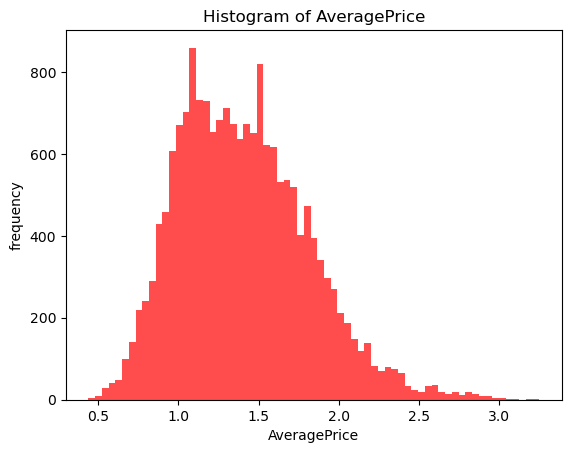

In [15]:
# Let's analyze the 'AveragePrice' column by using histogram plot

plt.hist(df['AveragePrice'], bins= 'auto', color= 'red', alpha=0.7)

# Add labels and title
plt.xlabel('AveragePrice')
plt.ylabel('frequency')
plt.title('Histogram of AveragePrice')
plt.show

Here we can see the peak is at 1.0 with a frequency of 800, that means it is a most commonly occurring average price for the avocados in the dataset.

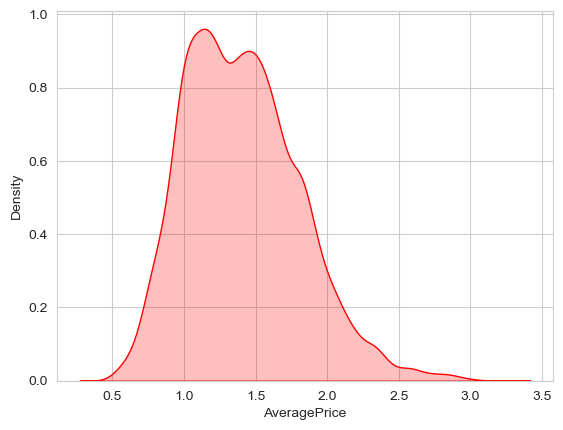

In [16]:
# Now let's analyze the 'AveragePrice' column by using density plot

sns.set_style("whitegrid")
sns.kdeplot(df["AveragePrice"], shade=True, color='red')
plt.show()

Here we can see bimodal distribution of the data.

2. Total Volume

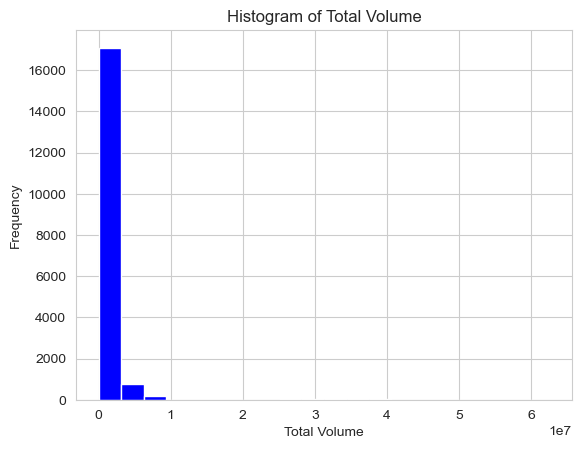

In [17]:
# Let's analyze the 'Total Volume' column by using histogram plot

plt.hist(df['Total Volume'], bins=20, color='blue')
plt.xlabel('Total Volume')
plt.ylabel('Frequency')
plt.title('Histogram of Total Volume')
plt.show()

Here we can observe that the almost plot is blank and all the values and peak is at 0 in frequency of more than 16000 which shows that there may be lot of extreme values and because of this it could lead to high numbers of bins resulting an disorted plot or highly skewed plot.

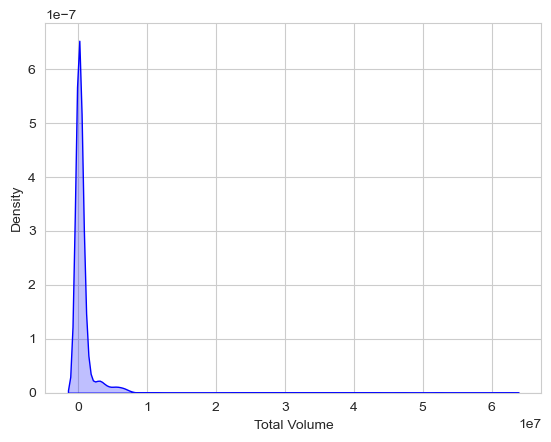

In [18]:
# Now let's analyze the 'Total Volume' column by using density plot

sns.set_style("whitegrid")
sns.kdeplot(df["Total Volume"], shade=True, color='blue')
plt.show()

Here we can clearly see that distribution is highly positive skewed.

3. 4046 (PLU-4046) Column

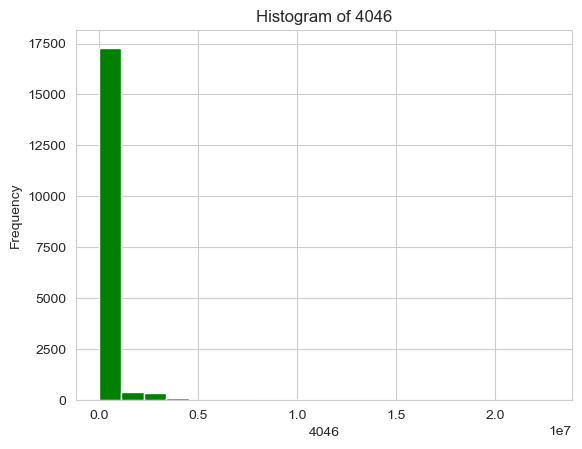

In [19]:
# Let's analyze the '4046' column by using histogram plot

plt.hist(df['4046'], bins=20, color='green')
plt.xlabel('4046')
plt.ylabel('Frequency')
plt.title('Histogram of 4046')
plt.show()

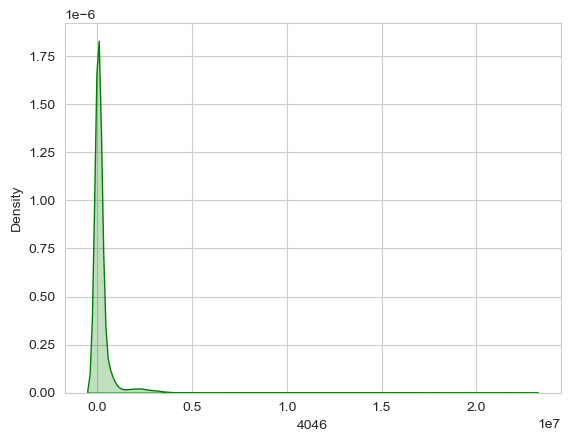

In [20]:
# Now let's analyze the '4046' column by using density plot

sns.set_style("whitegrid")
sns.kdeplot(df["4046"], shade=True, color='green')
plt.show()

4. 4225(PLU-4225)  Column

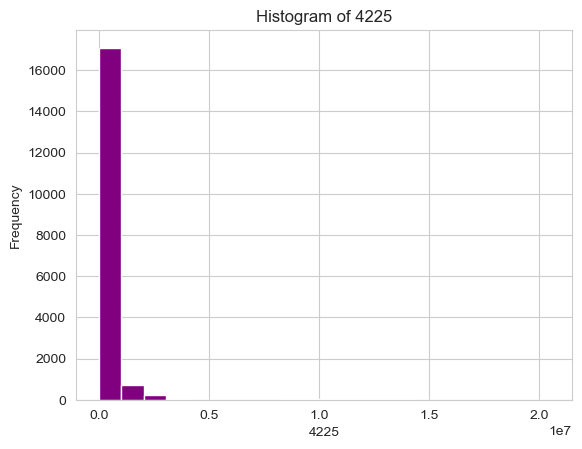

In [21]:
# Let's analyze the '4225' column by using histogram plot

plt.hist(df['4225'], bins=20, color='purple')
plt.xlabel('4225')
plt.ylabel('Frequency')
plt.title('Histogram of 4225')
plt.show()

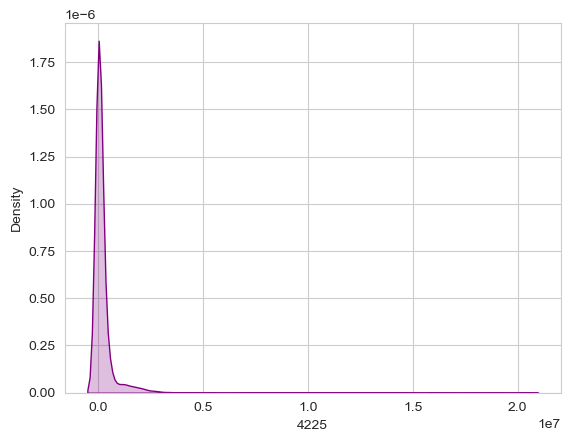

In [22]:
# Now let's analyze the '4225' column by using density plot

sns.set_style("whitegrid")
sns.kdeplot(df["4225"], shade=True, color='purple')
plt.show()

5. 4770(PLU-4770) Column

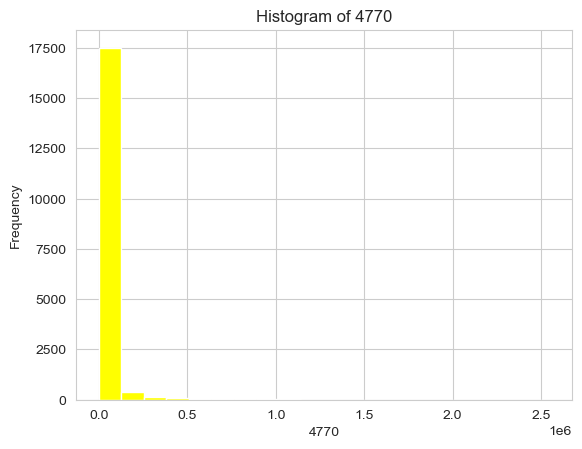

In [23]:
# Let's analyze the '4770' column by using histogram plot

plt.hist(df['4770'], bins=20, color='yellow')
plt.xlabel('4770')
plt.ylabel('Frequency')
plt.title('Histogram of 4770')
plt.show()

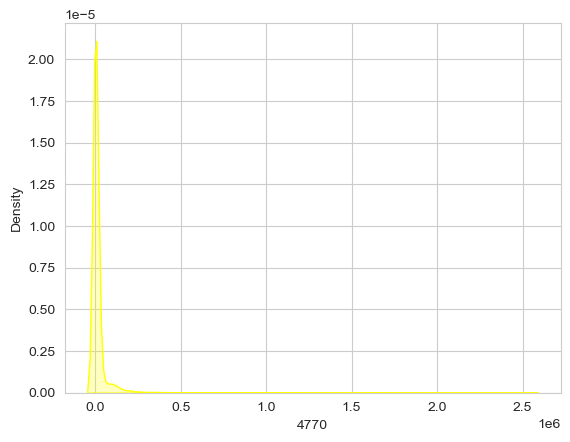

In [24]:
# Now let's analyze the '4770' column by using density plot

sns.set_style("whitegrid")
sns.kdeplot(df["4770"], shade=True, color='yellow')
plt.show()

6. Total Bags Column

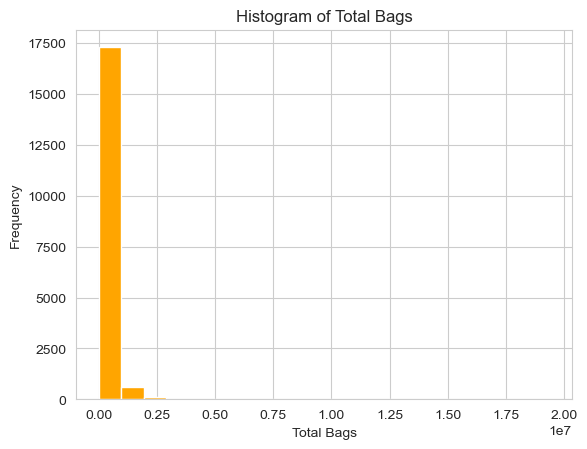

In [25]:
# Let's analyze the 'Total Bags' column by using histogram plot

plt.hist(df['Total Bags'], bins=20, color='orange')
plt.xlabel('Total Bags')
plt.ylabel('Frequency')
plt.title('Histogram of Total Bags')
plt.show()

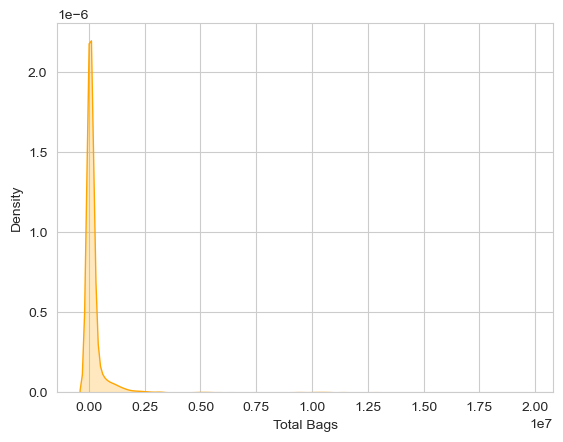

In [26]:
# Now let's analyze the 'Total Bags' column by using density plot

sns.set_style("whitegrid")
sns.kdeplot(df["Total Bags"], shade=True, color='orange')
plt.show()

7. Small Bags

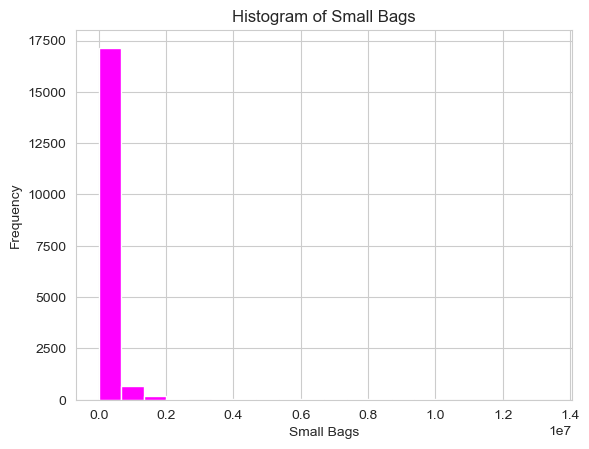

In [27]:
# Let's analyze the 'Small Bags' column by using histogram plot

plt.hist(df['Small Bags'], bins=20, color='magenta')
plt.xlabel('Small Bags')
plt.ylabel('Frequency')
plt.title('Histogram of Small Bags')
plt.show()

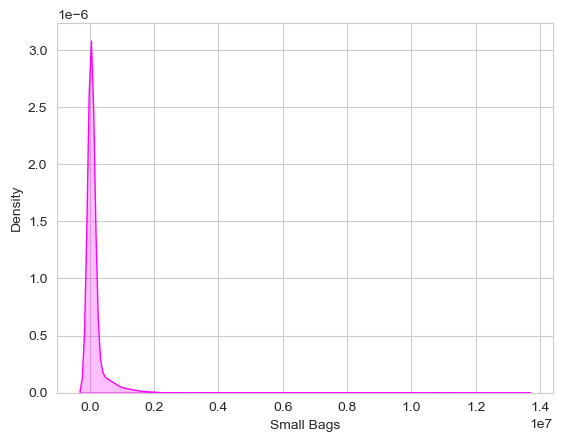

In [28]:
# Now let's analyze the 'Small Bags' column by using density plot

sns.set_style("whitegrid")
sns.kdeplot(df["Small Bags"], shade=True, color='magenta')
plt.show()

8. Large Bags Column

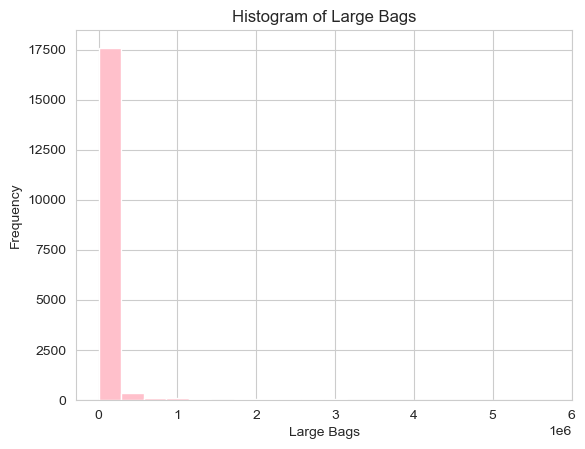

In [29]:
# Let's analyze the 'Large Bags' column by using histogram plot

plt.hist(df['Large Bags'], bins=20, color='pink')
plt.xlabel('Large Bags')
plt.ylabel('Frequency')
plt.title('Histogram of Large Bags')
plt.show()

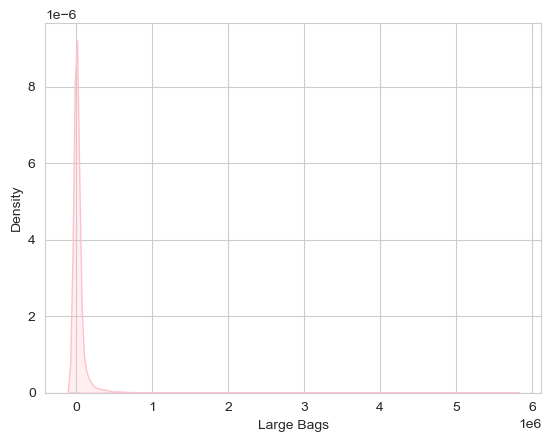

In [30]:
# Now let's analyze the 'Large Bags' column by using density plot

sns.set_style("whitegrid")
sns.kdeplot(df["Large Bags"], shade=True, color='pink')
plt.show()

9. Xlarge Bags Column

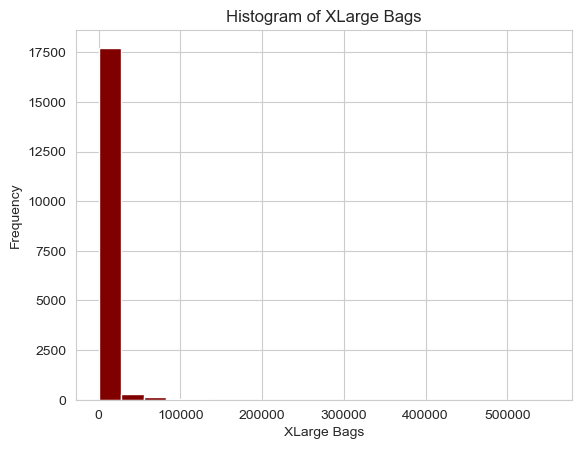

In [31]:
# Let's analyze the 'Xlarge Bags' column by using histogram plot

plt.hist(df['XLarge Bags'], bins=20, color='maroon')
plt.xlabel('XLarge Bags')
plt.ylabel('Frequency')
plt.title('Histogram of XLarge Bags')
plt.show()

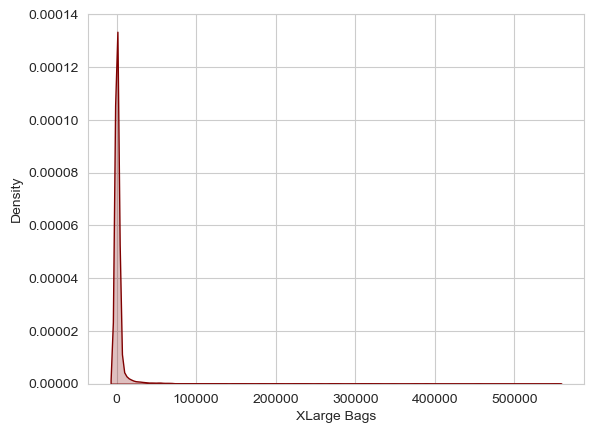

In [32]:
# Now let's analyze the 'Xlarge Bags' column by using density plot

sns.set_style("whitegrid")
sns.kdeplot(df["XLarge Bags"], shade=True, color='maroon')
plt.show()

As we can see above plot(histogram) of columns like 'Total Volume', {'4046', '4225', '4770'}PLU codes, 'Total Bags', 'Small Bags', 'Large Bags', and 'XLarge Bags' shows the distribution is highly skewed and all higher frequency values are from lower end, it may be because of high range of values for the columns which are leading to high numbers of bins and resulting the disorted plot. By this its difficult to analyze the distribution.

10. Year Column

<function matplotlib.pyplot.show(close=None, block=None)>

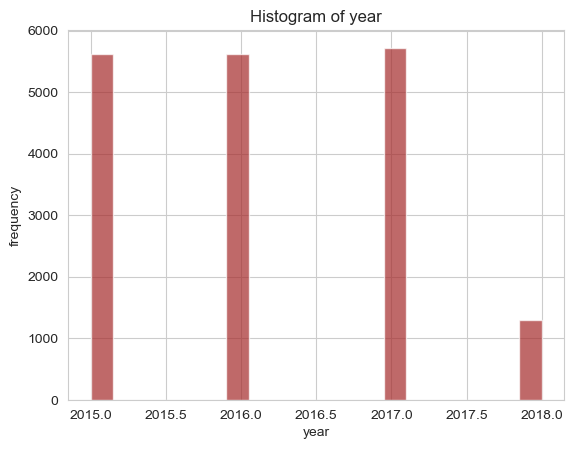

In [33]:
# Let's analyze the 'year' column by using histogram plot

plt.hist(df['year'], bins= 'auto', color= 'brown', alpha=0.7)
plt.xlabel('year')
plt.ylabel('frequency')
plt.title('Histogram of year')
plt.show

Here in this histogram we can see that peak of 2015,2016,and 2017 is equal and compare to this 2018 is much less,concludes that most frequent values of sale are from these years.

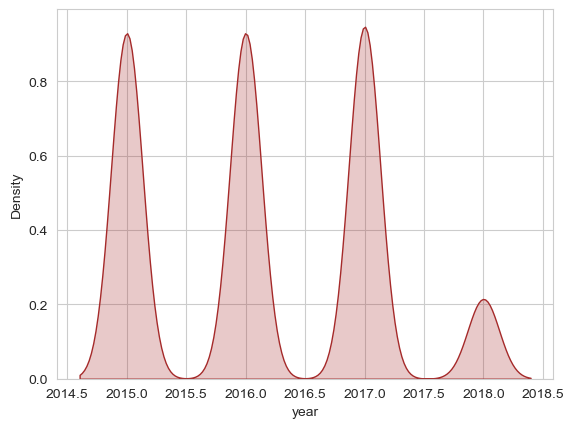

In [34]:
# Now let's analyze the 'year' column by using density plot

sns.set_style("whitegrid")
sns.kdeplot(df["year"], shade=True, color='brown')
plt.show()

Here in this density plot we can see bimodal distribution with two peaks.

 For Categorical column we will be using bar plot to visualize the data distribution and pattern.

13. Type Column

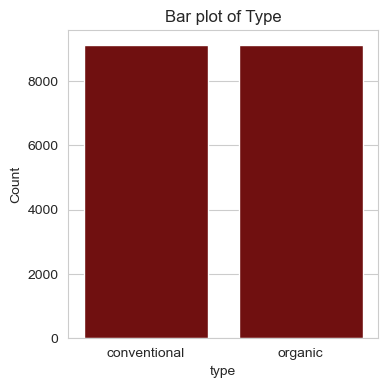

In [35]:
# Lets analyze the "Type" column by using bar plot

plt.figure(figsize= (4,4))
sns.countplot(x= 'type', data= df, color= 'maroon')
plt.title('Bar plot of Type')
plt.xlabel('type')
plt.ylabel('Count')
plt.show()

Here we can see in this bar plot that distribution is symmetrical as count for both are equal.

14. Region Column

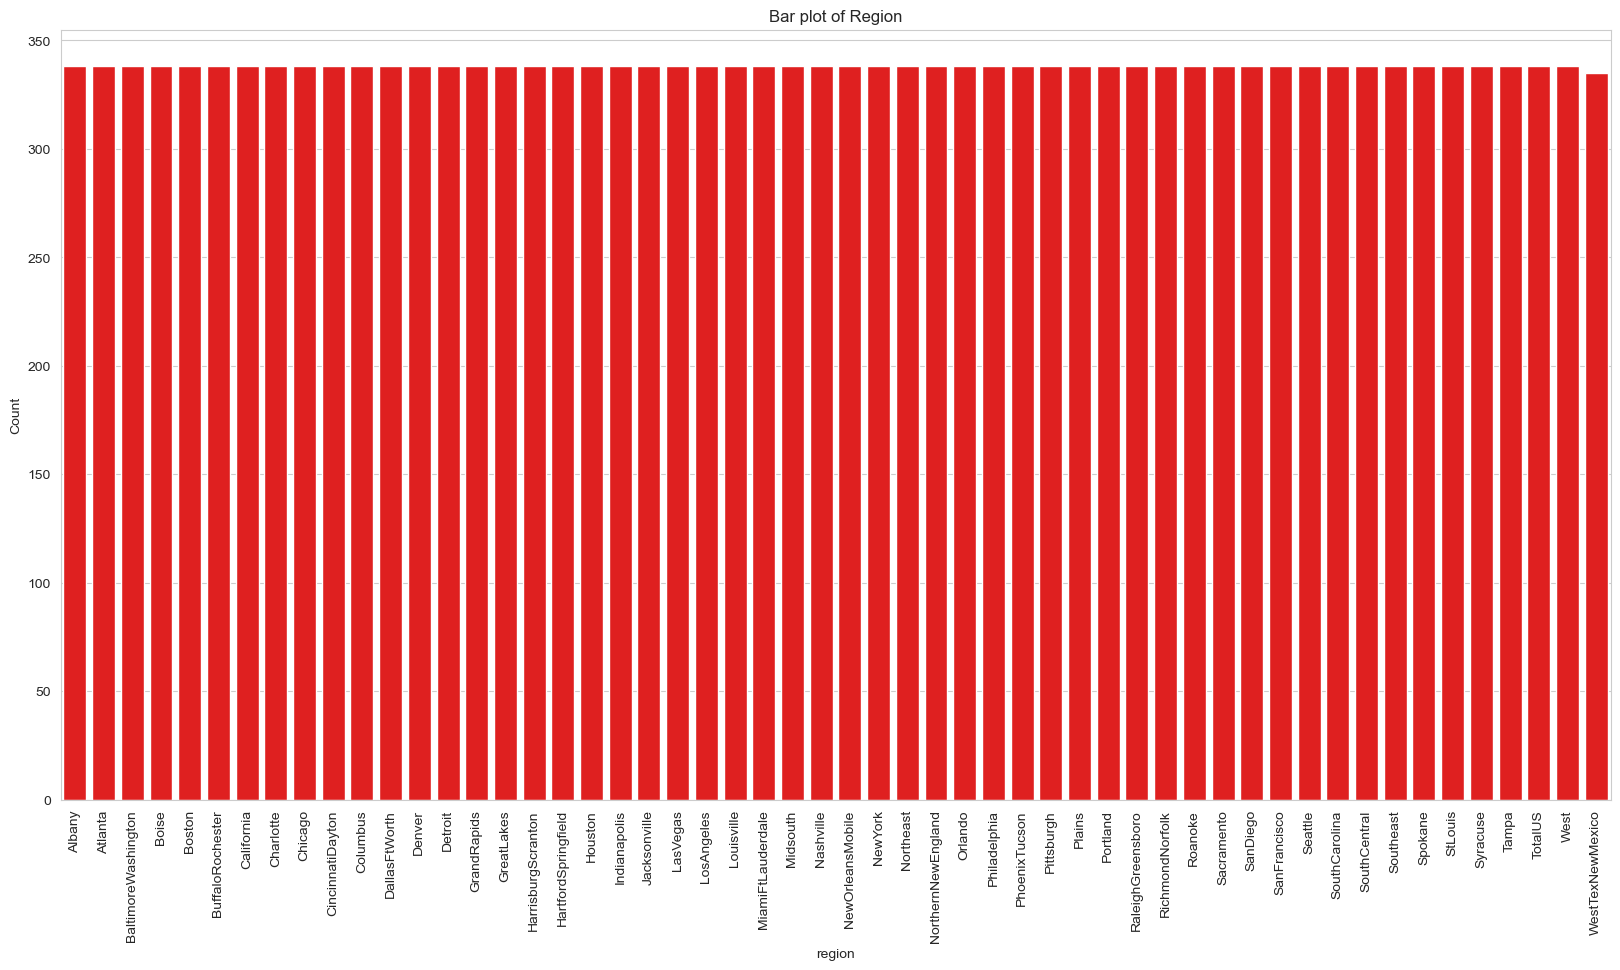

In [36]:
# Lets analyze the "Region" column by using bar plot

plt.figure(figsize= (20,10))
sns.countplot(x= 'region', data= df, color= 'red')
plt.title('Bar plot of Region')
plt.xlabel('region')
plt.ylabel('Count')
plt.xticks(rotation= 90)
plt.show()

As we can clearly see here the distribution is all symmetrical means equal for all regions except WestTexNewMexico here it is little less than others.

Bivariate Analysis

Here to analyze the relationsip between two variables we will be plotting Bar plot, grouped bar plot, count plot or violin plot (according to data and need of visualization )for one categorical vs one numerical column,and two categorical columns; and scatter plot for two numerical columns.

1. 'Region' vs 'AveragePrice' Columns

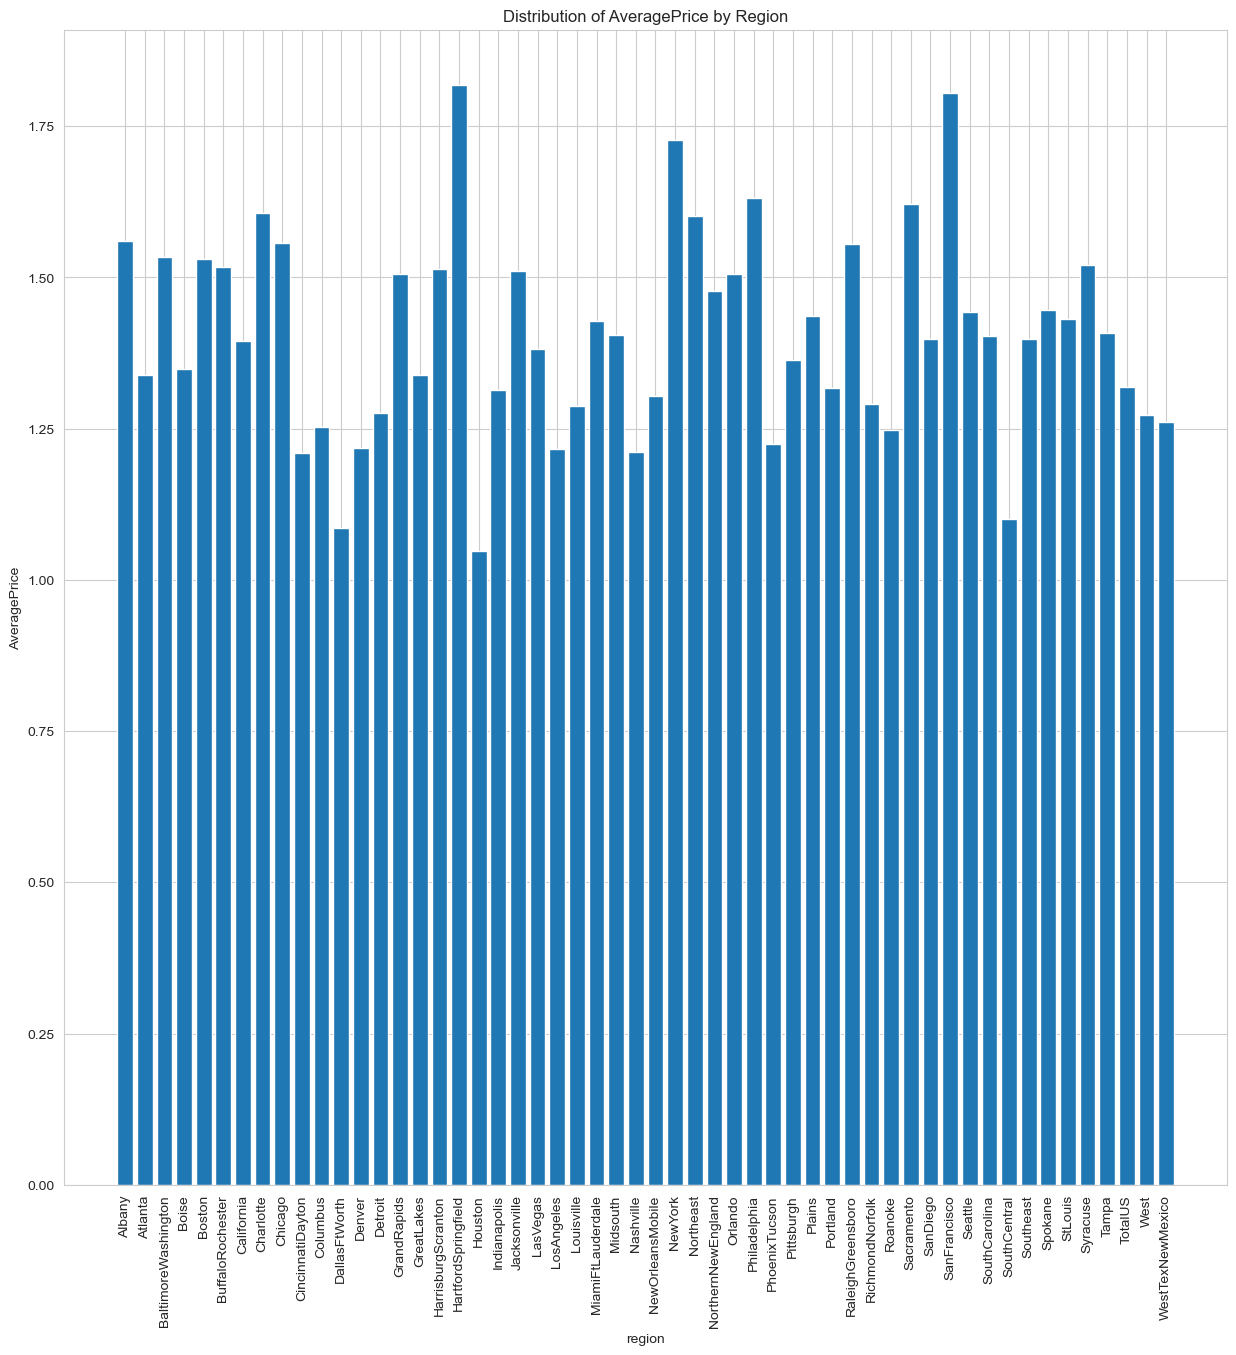

In [37]:
# Group the data by region and find the average price
average_price_by_region= df.groupby('region')['AveragePrice'].mean()

# Plot
plt.figure(figsize= (15,15))
plt.bar(average_price_by_region.index, average_price_by_region.values)
plt.title('Distribution of AveragePrice by Region')
plt.xlabel('region')
plt.ylabel('AveragePrice')
plt.xticks(rotation=90)
plt.show()

Here we can see the the HartfordSpringfield region has highest AveragePrice followed by SanFrancisco region. Housten has the least AveragePrice.

2. 'Region' vs 'Total Volume' Columns

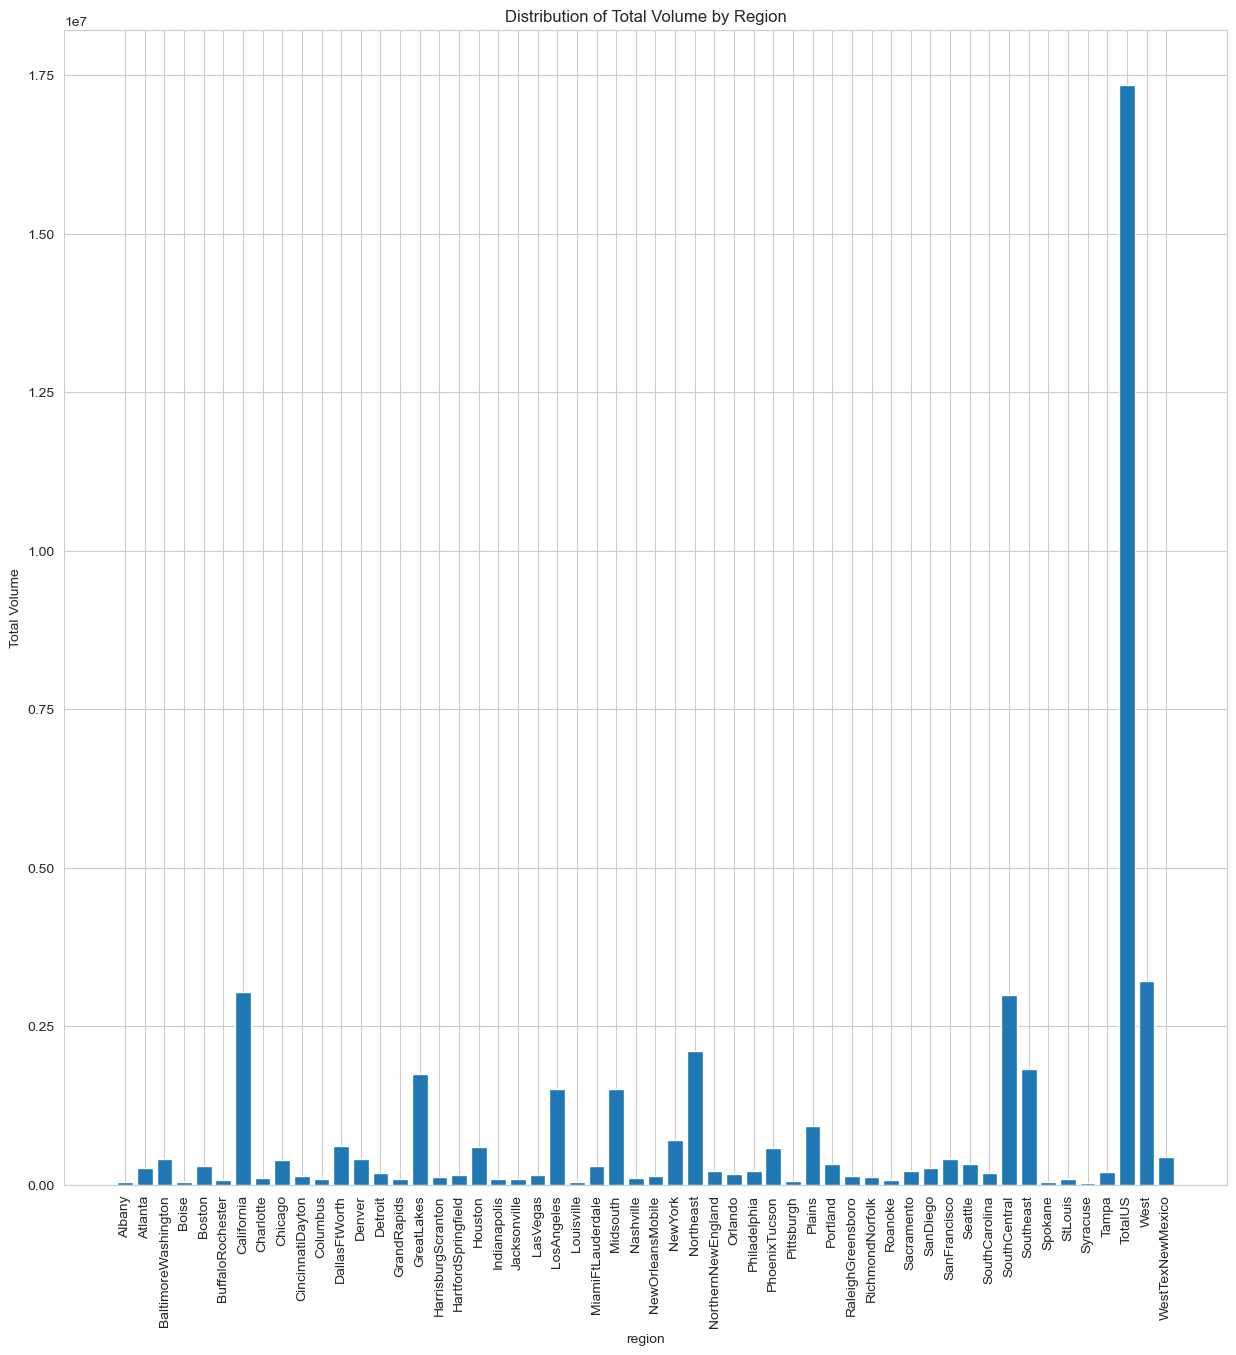

In [38]:
# Group the data by region and find the total volume
total_volume_by_region= df.groupby('region')['Total Volume'].mean()

# Plot
plt.figure(figsize= (15,15))
plt.bar(total_volume_by_region.index, total_volume_by_region.values)
plt.title('Distribution of Total Volume by Region')
plt.xlabel('region')
plt.ylabel('Total Volume')
plt.xticks(rotation=90)
plt.show()

Here we can see the TotalUS regions has highest number of avocados sold(Total Volume).

3. 'Region' vs 'Year' Columns

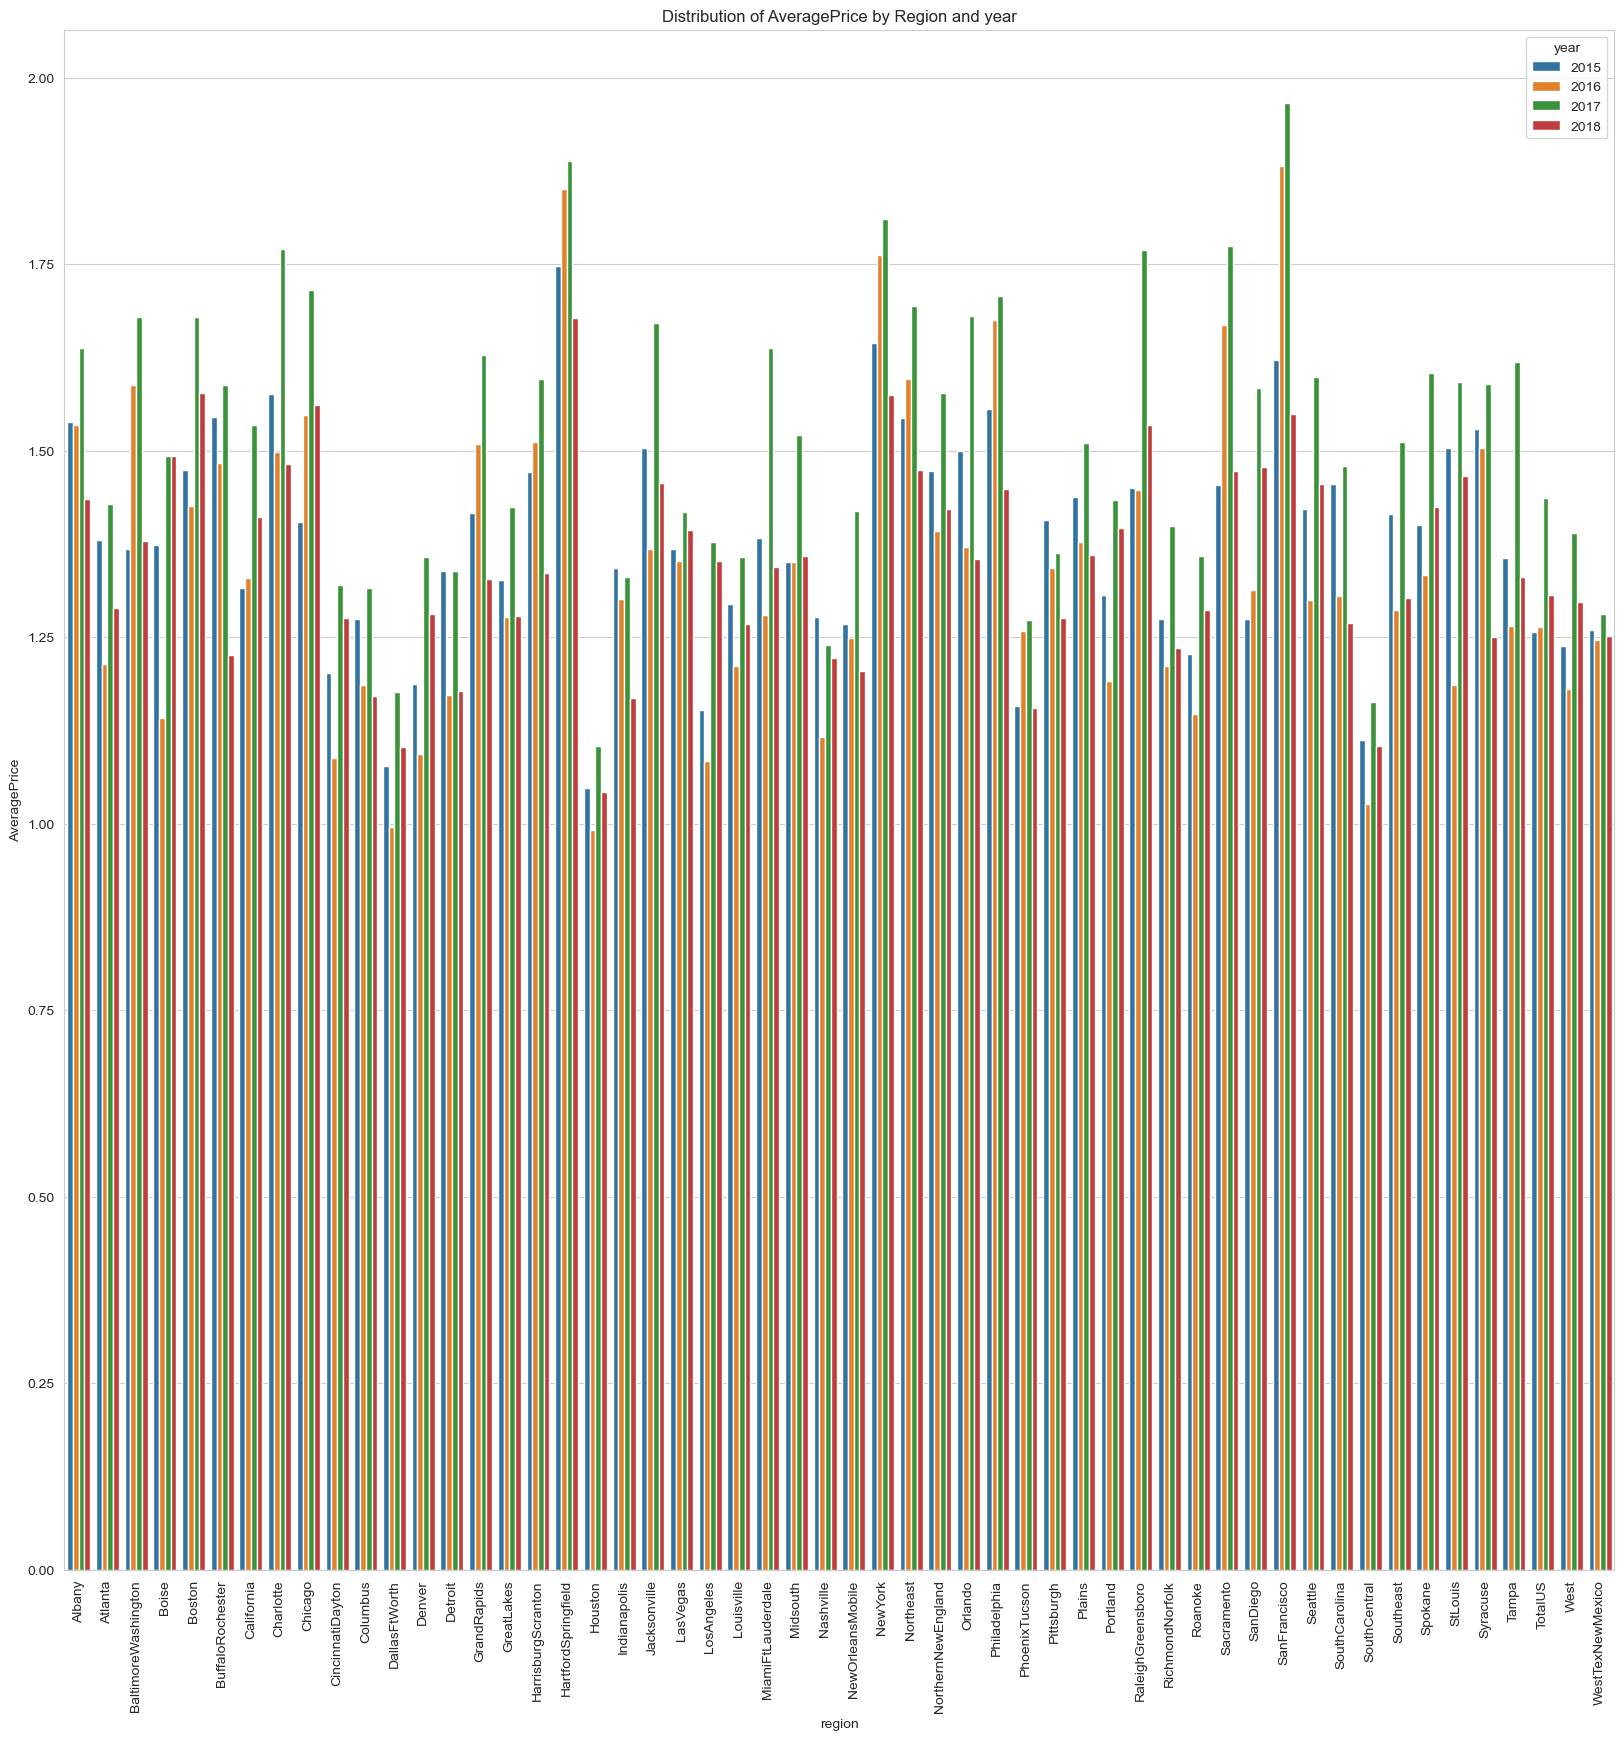

In [39]:
# Group the data by region and find the average price
average_price_by_region_year= df.groupby(['region', 'year'])['AveragePrice'].mean()
average_price_by_region_year= average_price_by_region_year.reset_index()

# Plot
plt.figure(figsize= (20,20))
sns.barplot(data= average_price_by_region_year, x= 'region', y= 'AveragePrice', hue= 'year')
plt.title('Distribution of AveragePrice by Region and year')
plt.xlabel('region')
plt.ylabel('AveragePrice')
plt.xticks(rotation=90)
plt.show()

Here we can see that the 2017 year has the highest AveragePrice in the SanFrancisco region from this plot. Here we can clearly see that four different colors bar represents different year of sale.

4. 'region' vs 'type' Columns

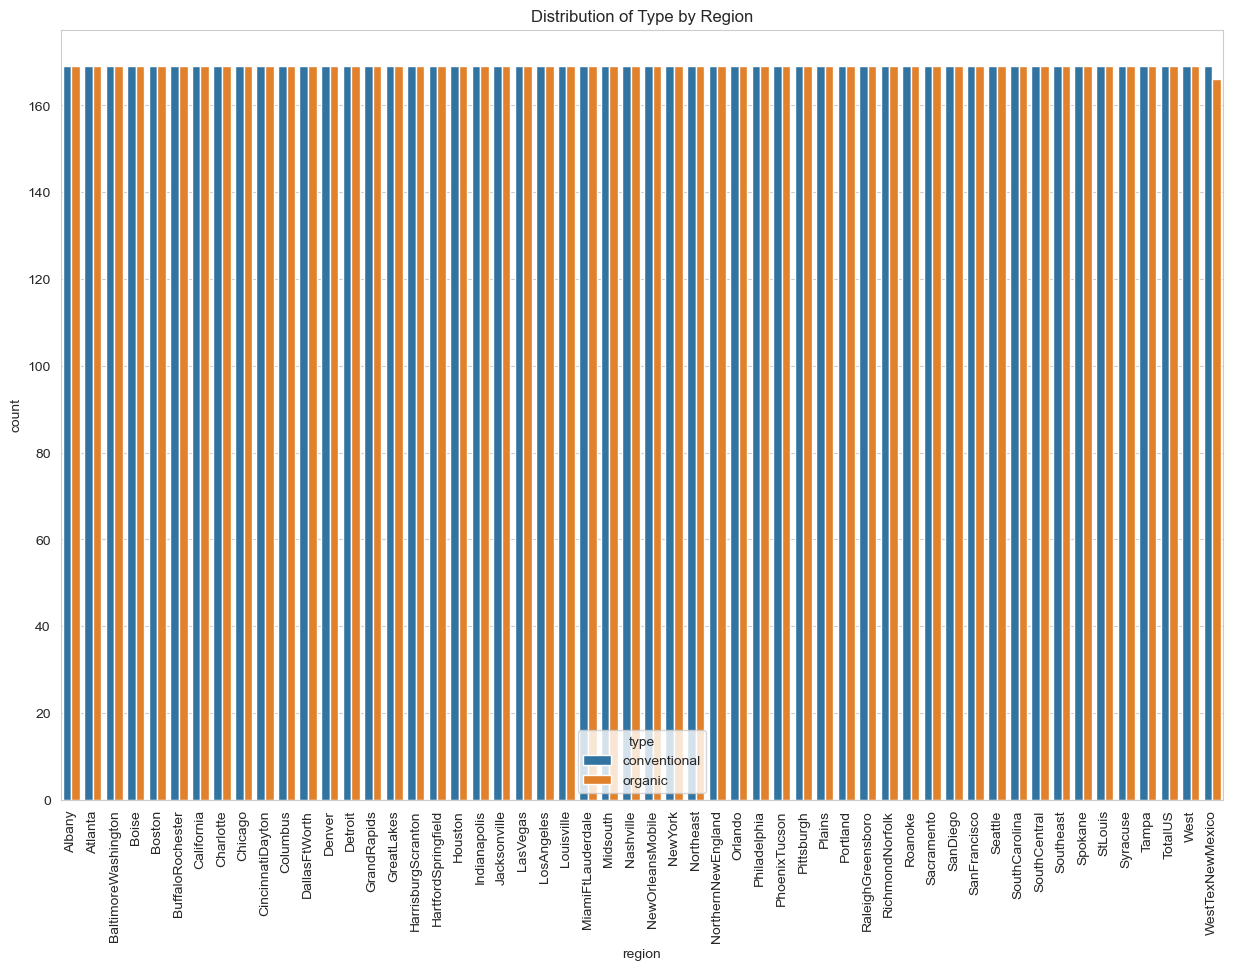

In [40]:
plt.figure(figsize= (15,10))
sns.countplot(data= df, x= 'region', hue= 'type')
plt.title('Distribution of Type by Region')
plt.xlabel('region')
plt.ylabel('count')
plt.xticks(rotation= 90)
plt.show()

Here in this plot we can see two colors are there to defined the types, which is showing that for every region distribution of types are same.

5. 'AveragePrice' vs 'type' Columns

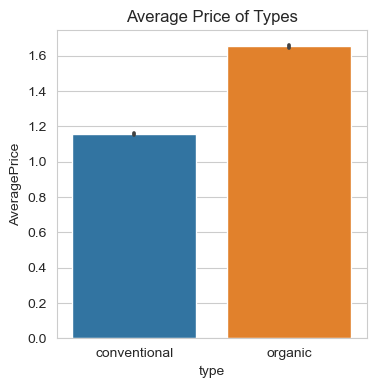

In [41]:
plt.figure(figsize= (4,4))
sns.barplot(data= df, x= 'type', y= 'AveragePrice')
plt.xlabel('type')
plt.ylabel('AveragePrice')
plt.title('Average Price of Types')
plt.show()

Here we can see Averageprice pf organic type is higher than the conventional.

6. 'AveragePrice' vs 'year' Columns

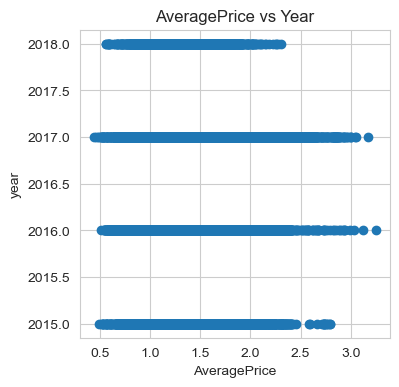

In [42]:
plt.figure(figsize= (4,4))
plt.scatter(df['AveragePrice'], df['year'])
plt.title('AveragePrice vs Year')
plt.xlabel('AveragePrice')
plt.ylabel('year')
plt.show()

Here in this plot we can see horizontal blue clustered dots arrange in a line which suggests that there are specific values or ranges of average prices that occur consistently for each year.

7. 'AveragePrice' vs 'Total Volume' Columns

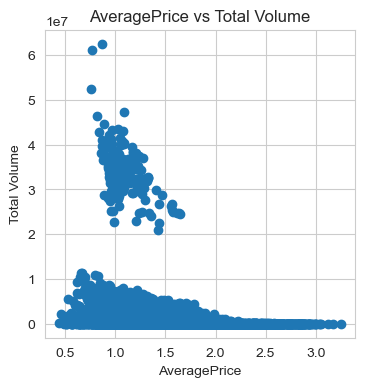

In [43]:
plt.figure(figsize= (4,4))
plt.scatter(df['AveragePrice'], df['Total Volume'])
plt.title('AveragePrice vs Total Volume')
plt.xlabel('AveragePrice')
plt.ylabel('Total Volume')
plt.show()

Here we can see null relation, as data are forming cluster at different values. Sometime it is showing slight negative pattern and then null. Basically visualization is not clear. 

8. 'Total Volume' vs 'year' Columns

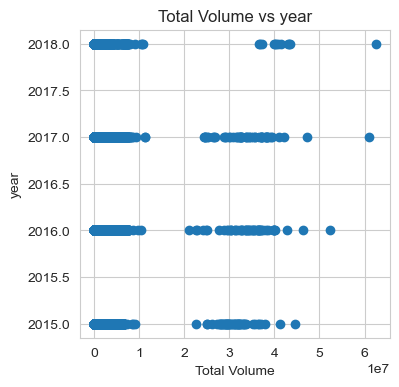

In [44]:
plt.figure(figsize= (4,4))
plt.scatter(df['Total Volume'], df['year'])
plt.title('Total Volume vs year')
plt.xlabel('Total Volume')
plt.ylabel('year')
plt.show()

Here in this plot we can see horizontal blue clustered dots arrange in a line which suggests that there are specific values or ranges of average prices that occur consistently for each year.

Multivariate Analysis

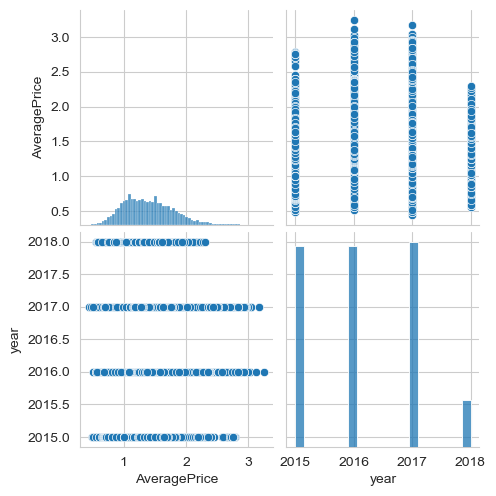

In [45]:
# Lets analyze relationship of all numerical column more clearly with multivariate analysis

sns.pairplot(data=df, vars=['AveragePrice','year'])
plt.show()

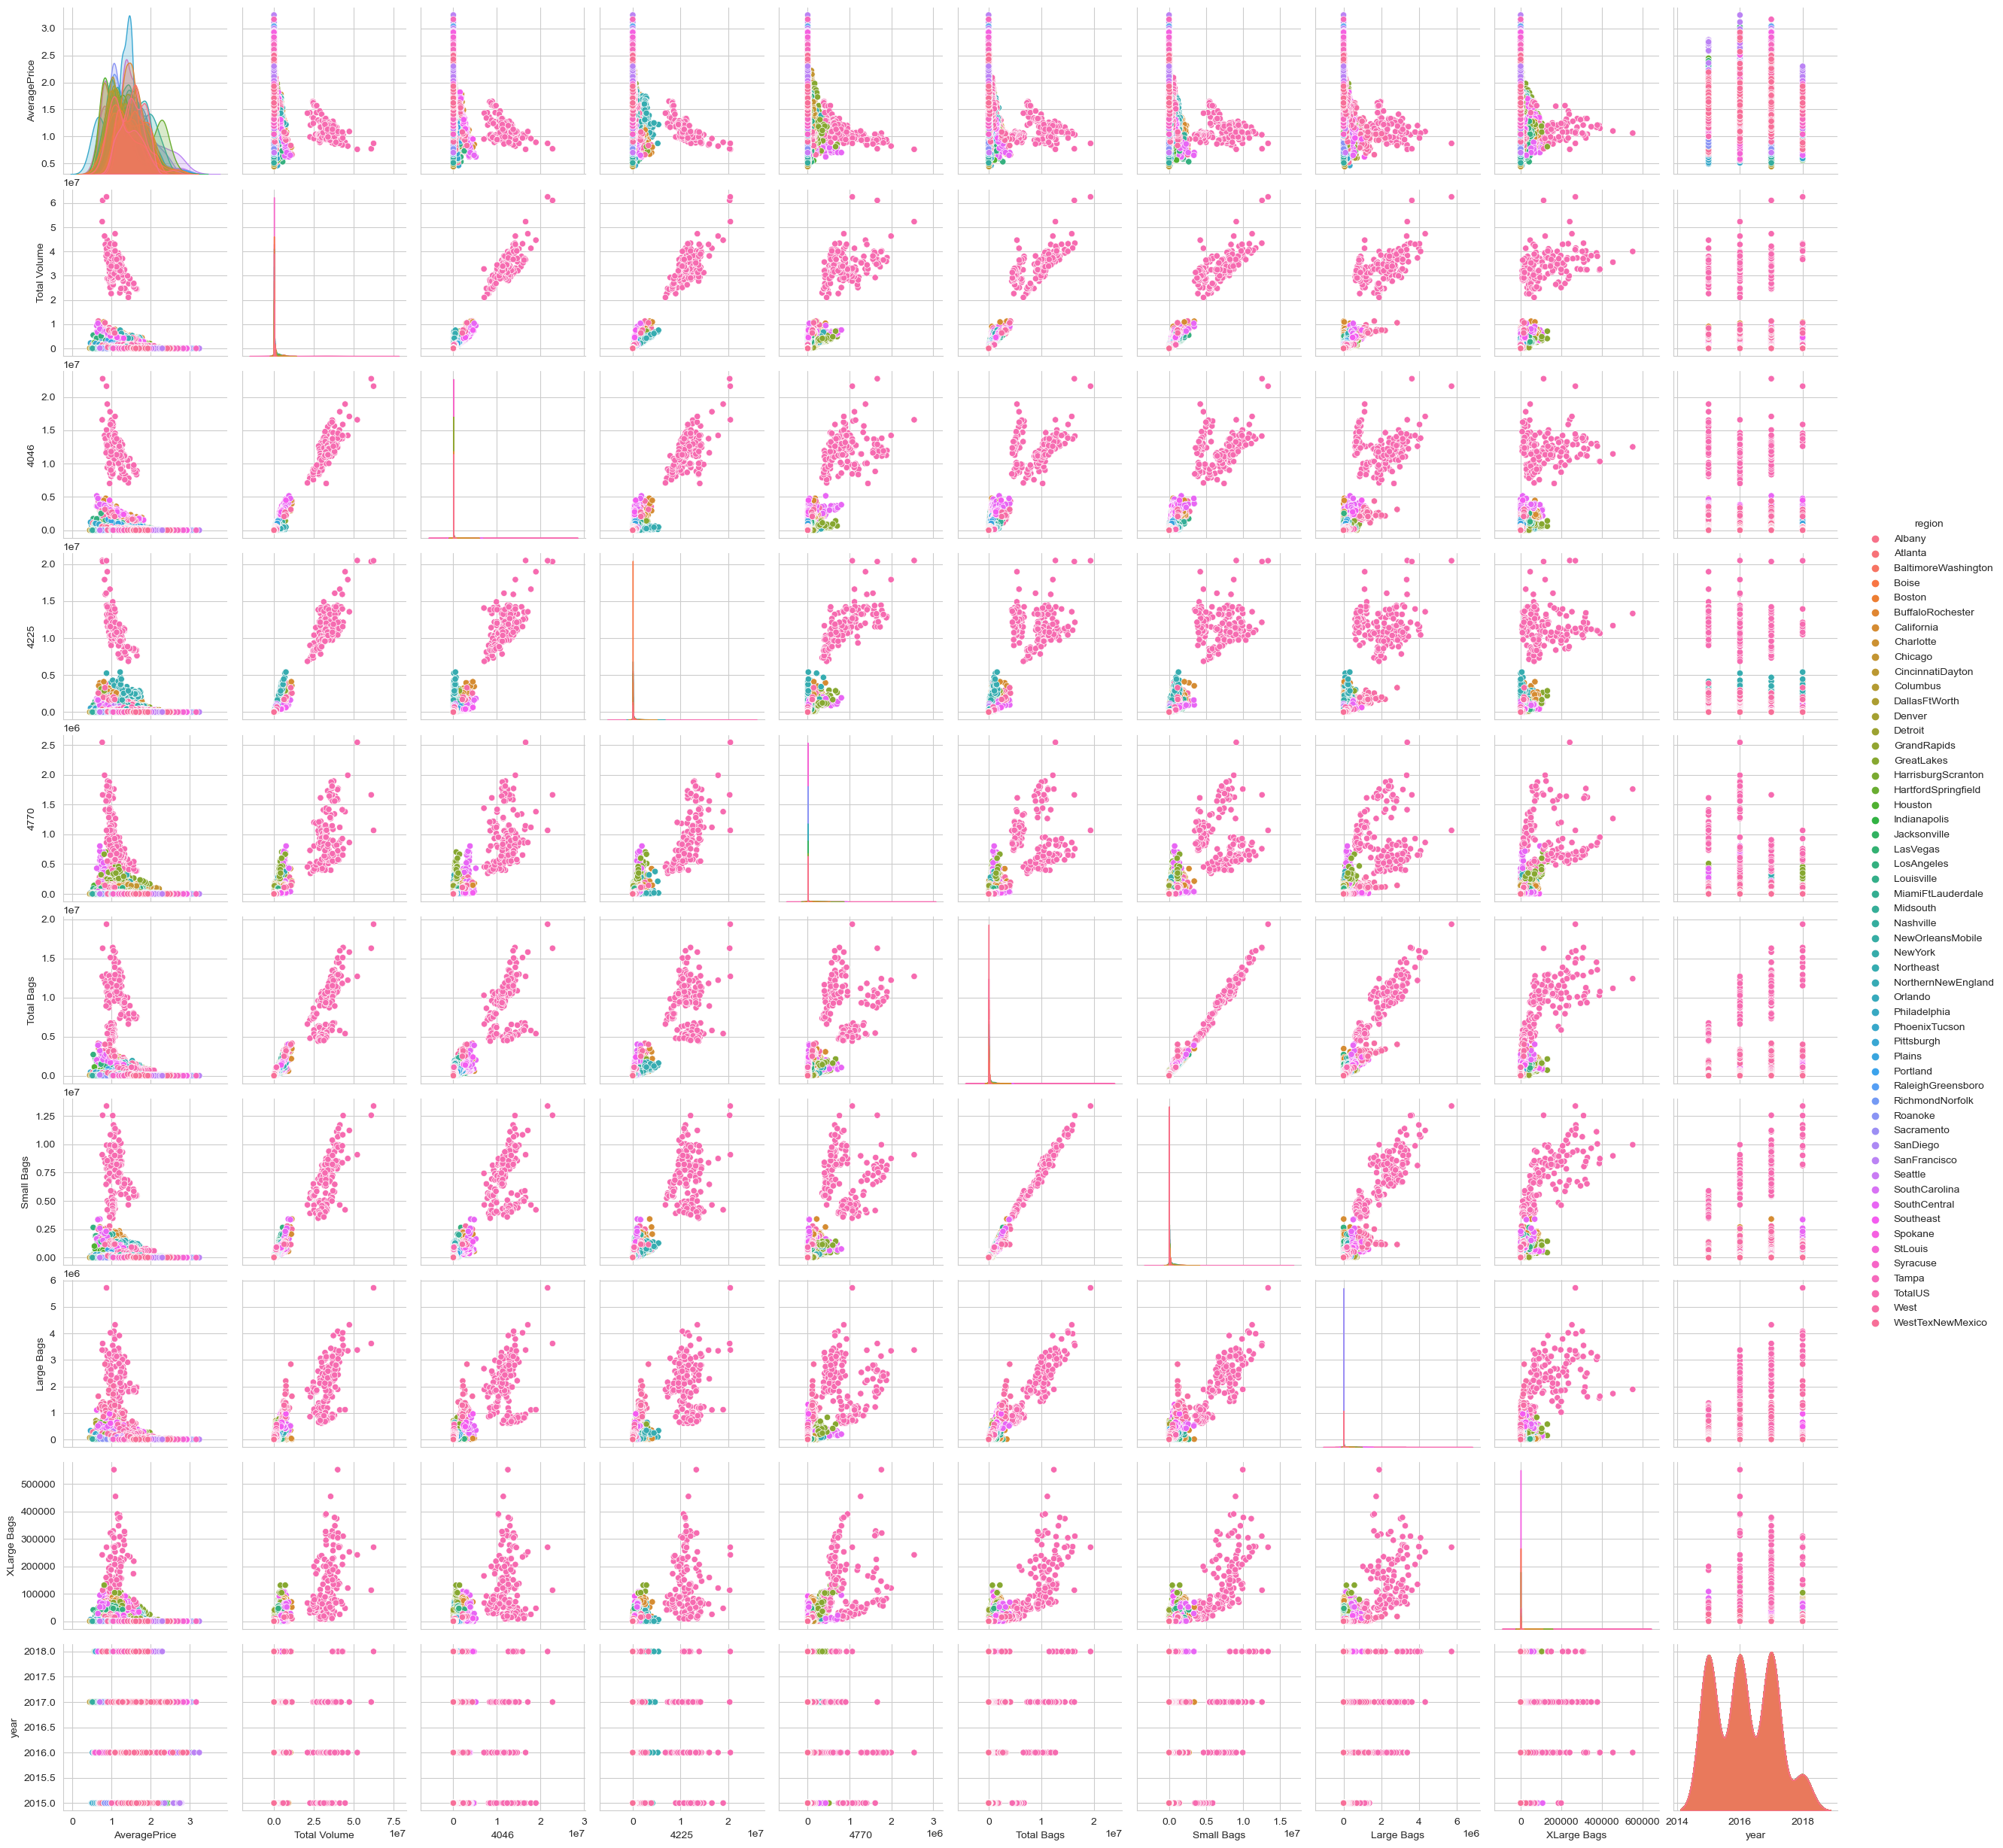

In [46]:
sns.pairplot(data=df, hue= 'region')

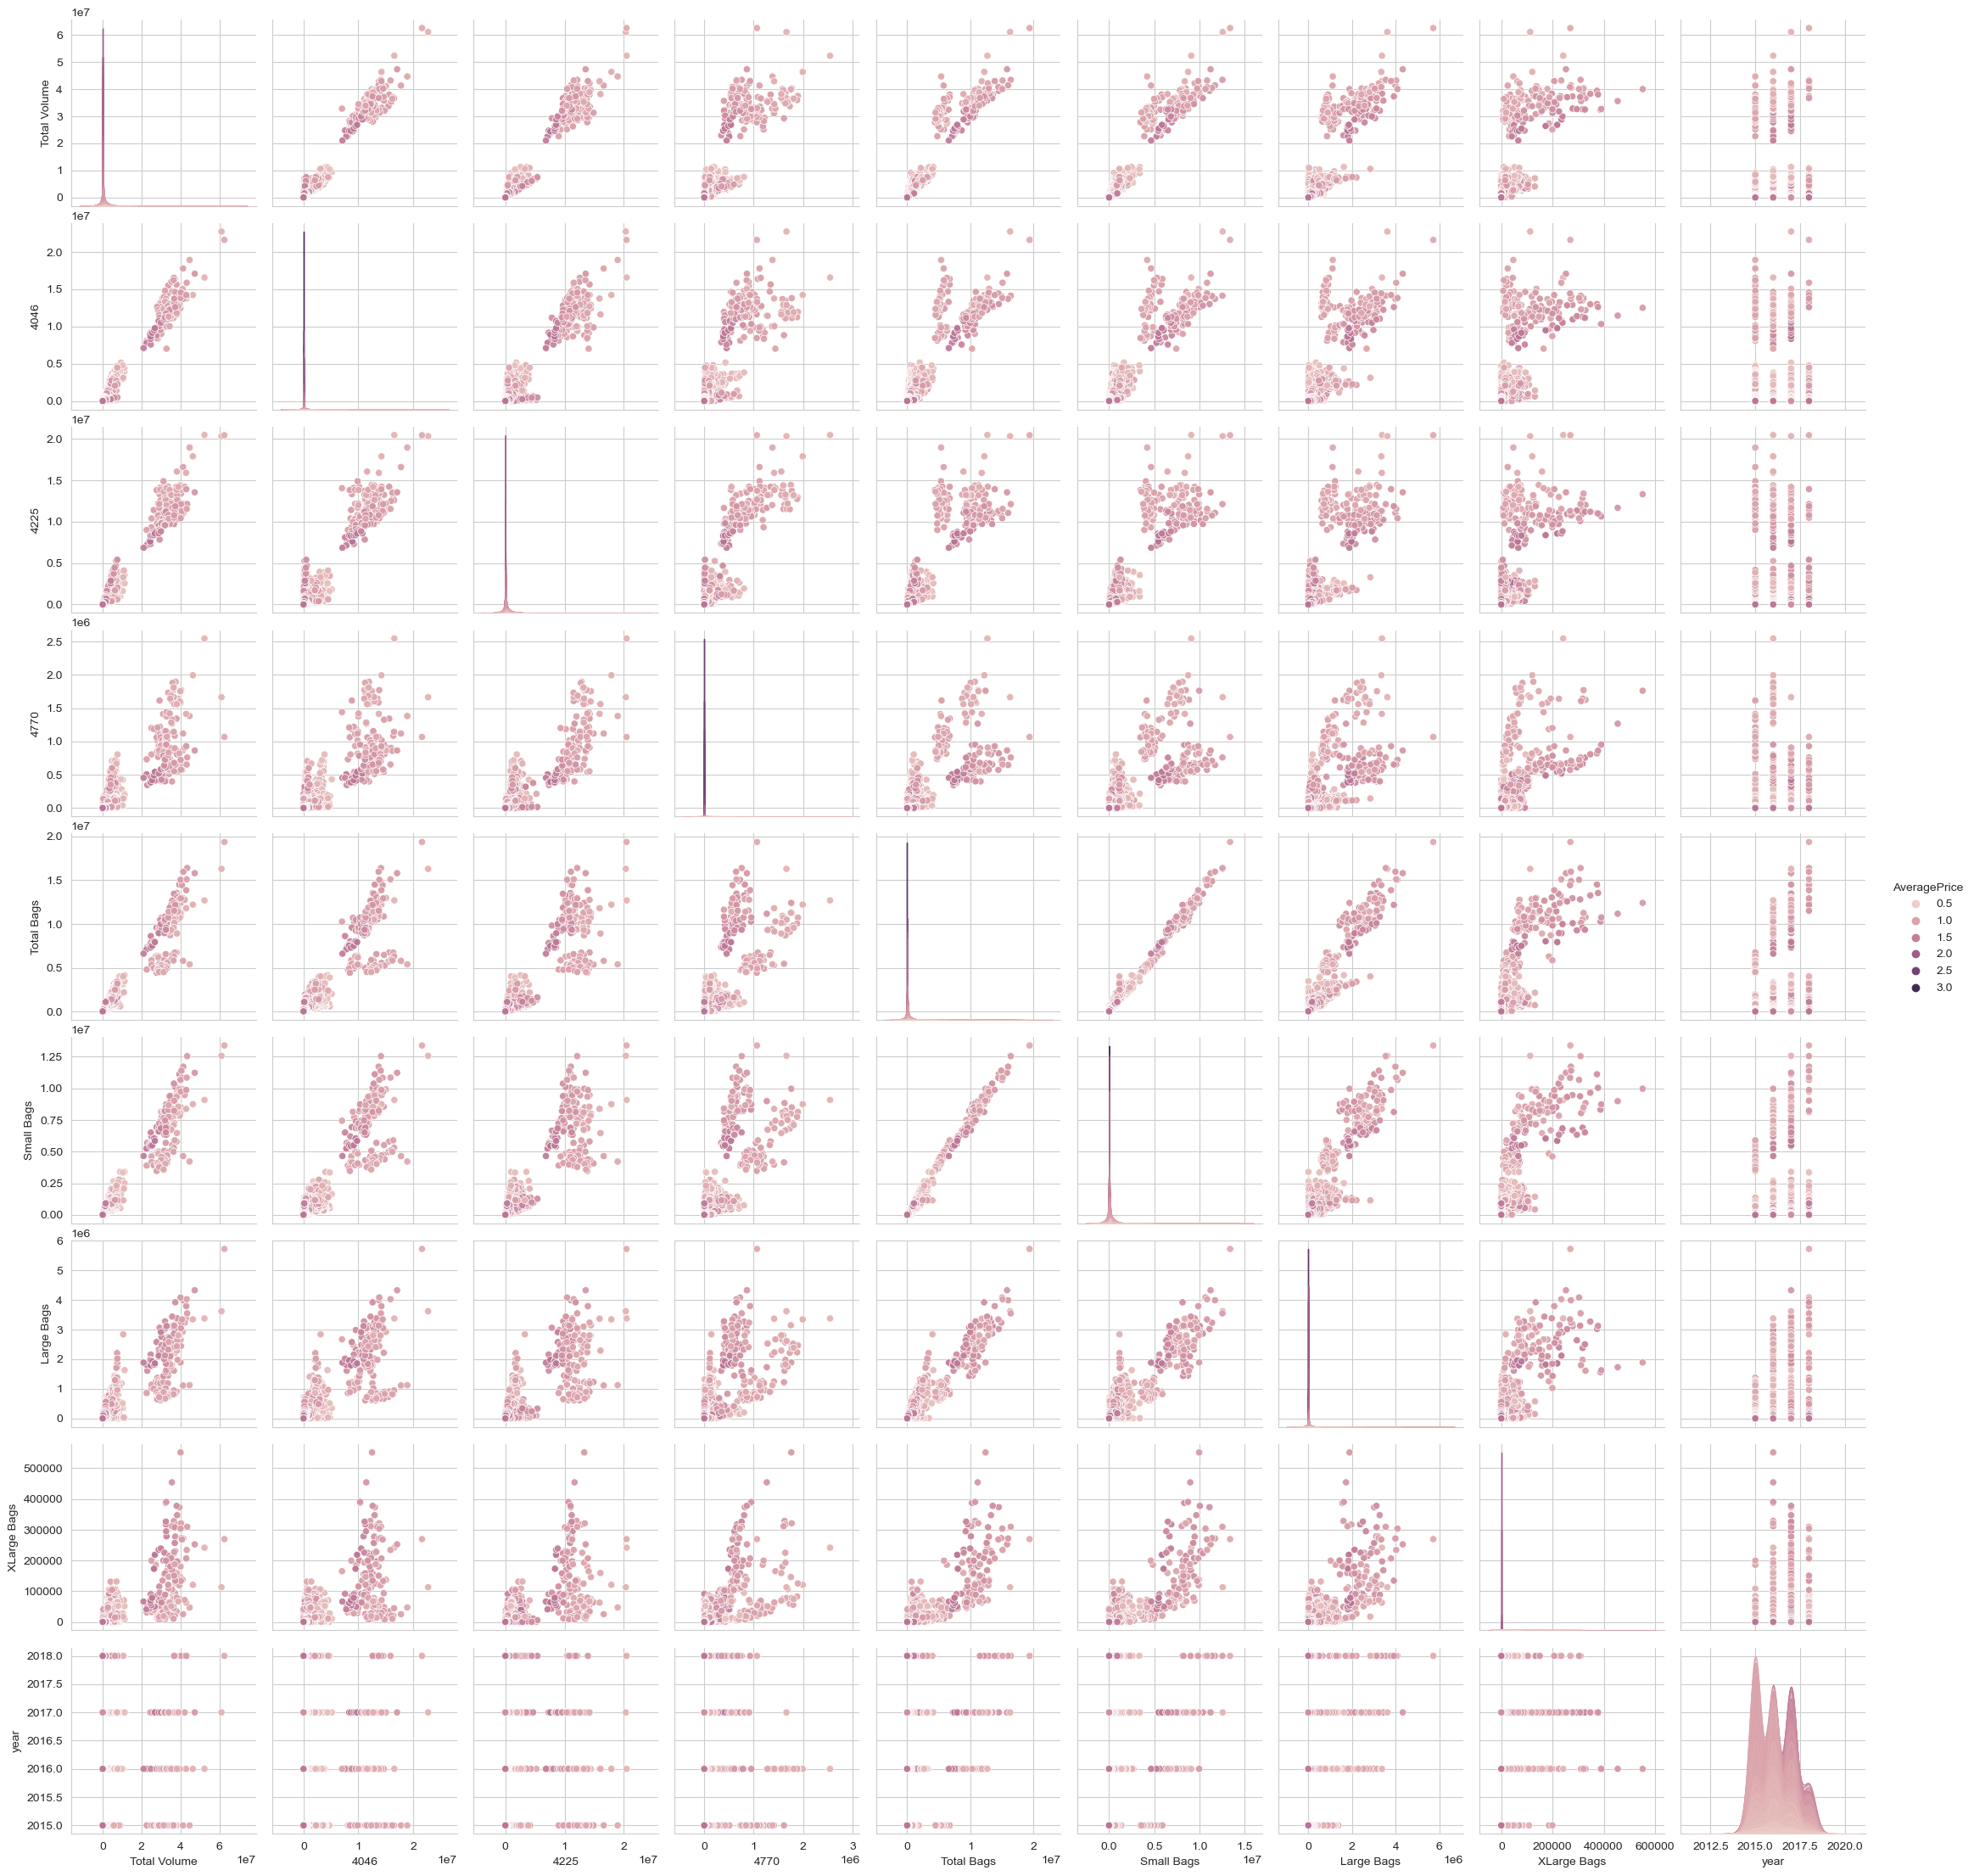

In [47]:
sns.pairplot(data=df, hue= 'AveragePrice')

As we can see there is no clear relation or pattern is visible by this analysis.

Even with any graphical visualization there is no clear insight of data we have seen. So let's move with the Data preprocessing steps.

# Data Preprocessing

Here in this preprocessing step, we will be checking data with outliers, skewness , and  will handle them using the different or suitable required technique.  We will be encoding categorical columns so that it will be easy for prediction. After that we will check the correlation and will do some feature engineering to know the suitable features for predictions and visualize that by using heatmap.

# Outliers

Here first we will check all the numerical columns to check the presence of outliers there and then will proceed with handling them either by treating them or by removing them.

We will be using winsorizing method first to treat outliers and then will be using clip() function to limit the extreme values. By cliping these extreme values we will be setting boundaries to prevent extremely high or low values from skewing the data for analysisresults. This will help us here ti mitigate the impact of outliers and extreme observations on the analysis.

For this we will be importing necessary library first from scipy.stats.mstats

Winsorizing Method: Winsorizing is a data transformation technique used to handle outliers or extreme values in a dataset. It involves replacing extreme values with less extreme values, thereby reducing the impact of outliers on statistical analysis. In winsorizing, we will be trimming or censoring the extreme values by replacing them with the value which is closer to rest of the data. It helps in reducoing the impact of outliers on the statistical measures and provides a more robust analysis.It ensures that extreme values do not unduly influence the results or skew the distribution of the data.

In [48]:
df.shape

(18249, 12)

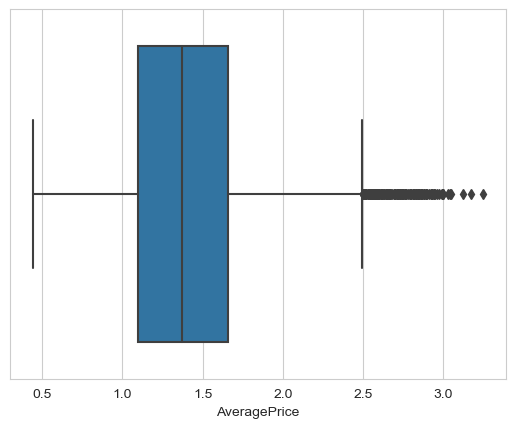

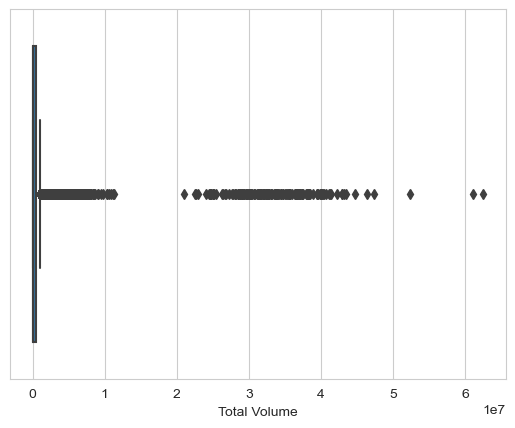

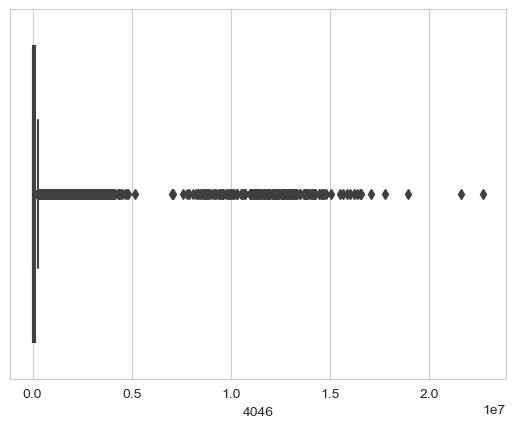

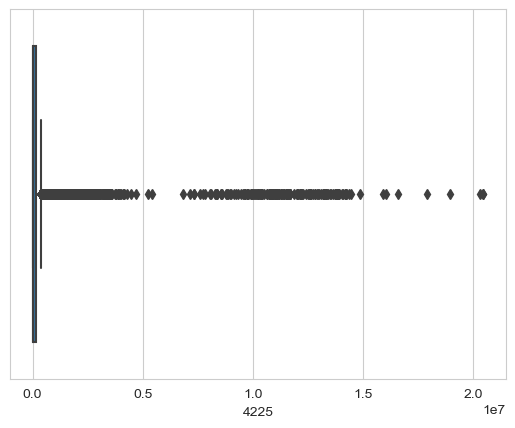

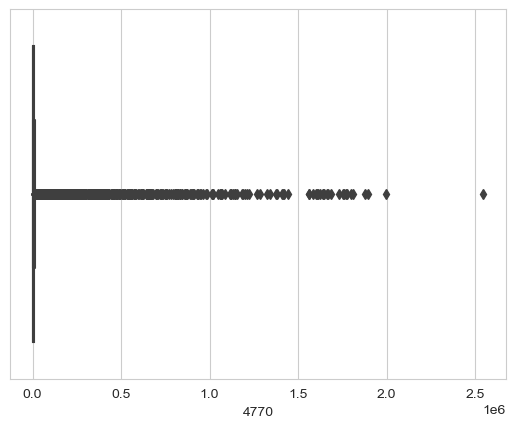

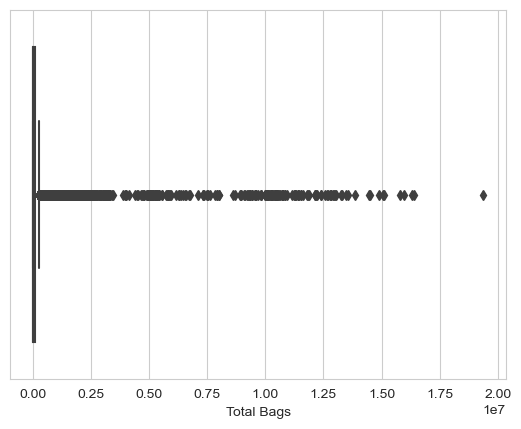

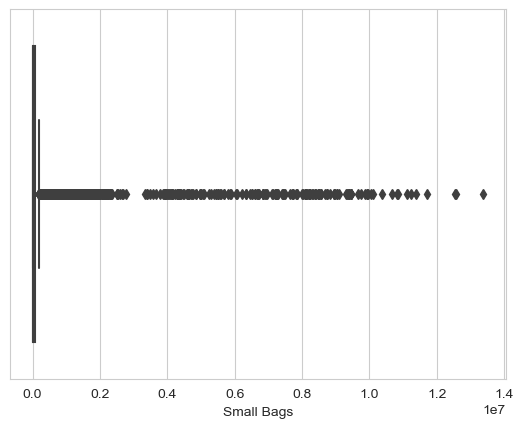

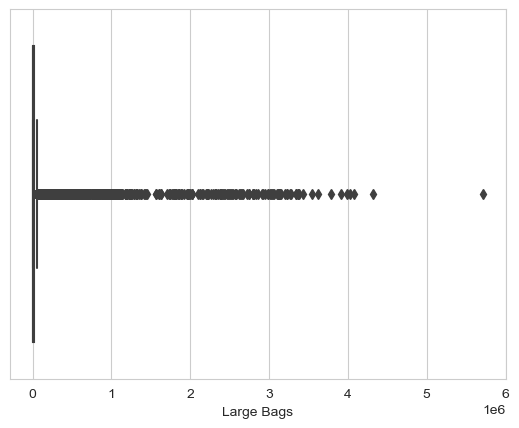

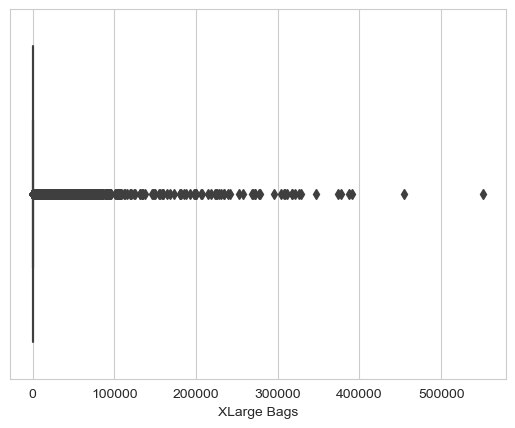

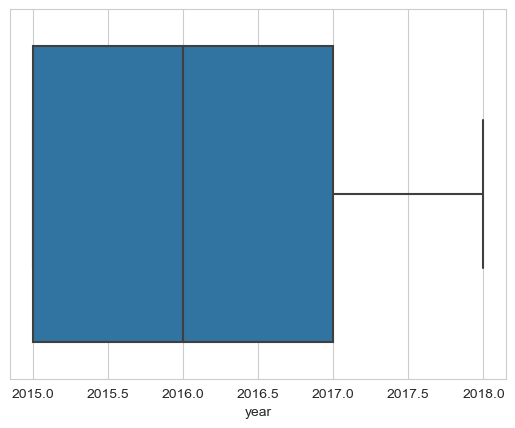

In [49]:
# Lets check the outliers

numerical_columns = ['AveragePrice','Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags','year']

for column in numerical_columns:
    sns.boxplot(x=df[column])
    plt.show()

Here we can see the presence of outiers in all numerical columns except 'year', 'Month', and 'Quarter'.
So lets treat them first.

In [50]:
from scipy.stats.mstats import winsorize

# Winsorize all numerical columns
num_cols = df.select_dtypes(include=np.number).columns.tolist()
df[num_cols] = df[num_cols].apply(lambda x: winsorize(x, limits=[0.05, 0.05]), axis=0)

# Clip extreme values
clip_values = df[num_cols].quantile([0.01, 0.99])
df[num_cols] = df[num_cols].clip(lower=clip_values.loc[0.01], upper=clip_values.loc[0.99], axis=1)

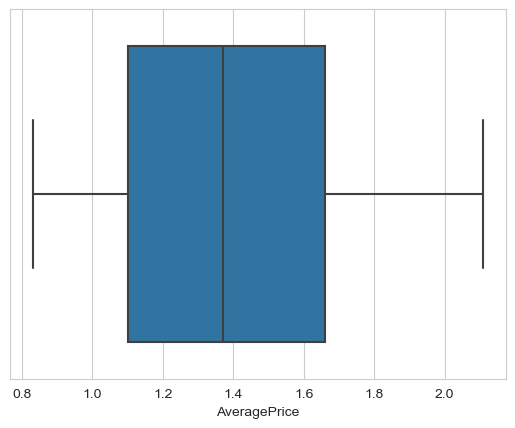

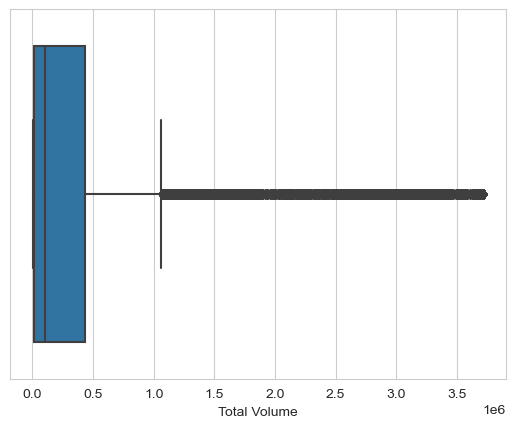

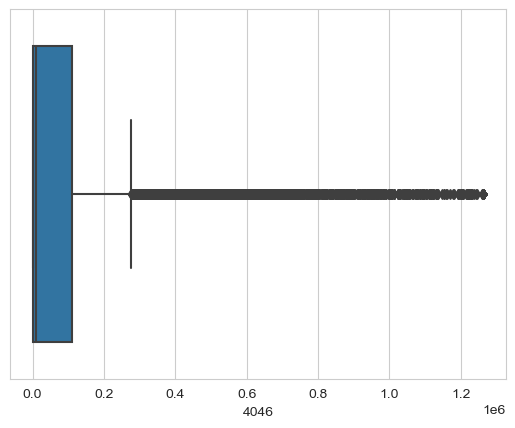

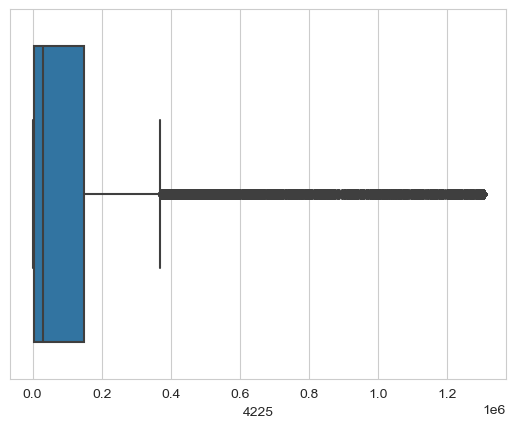

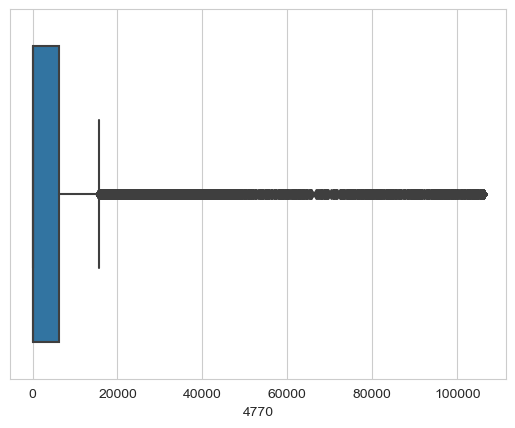

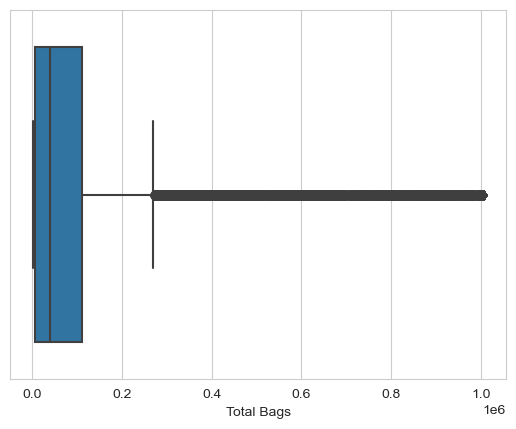

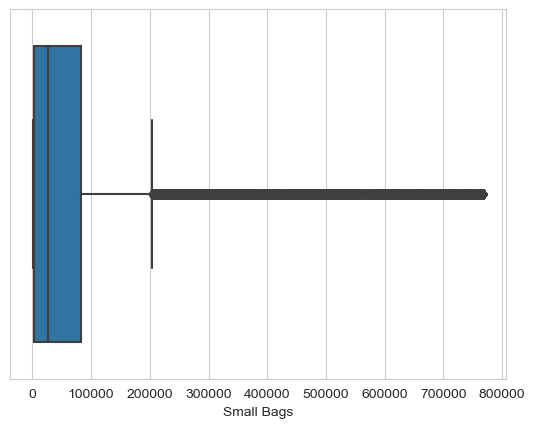

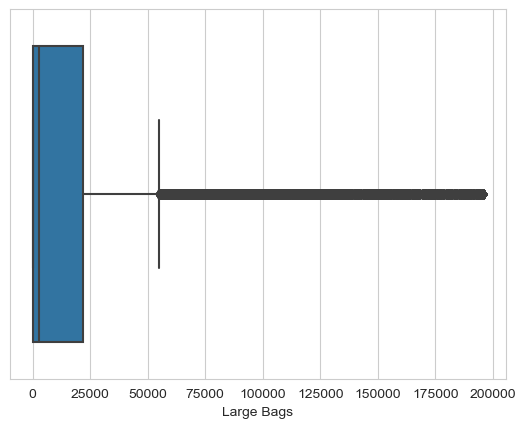

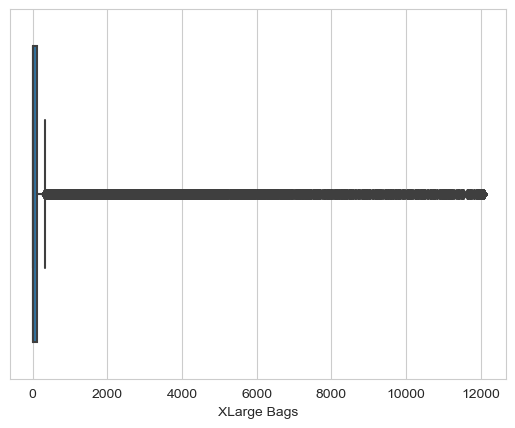

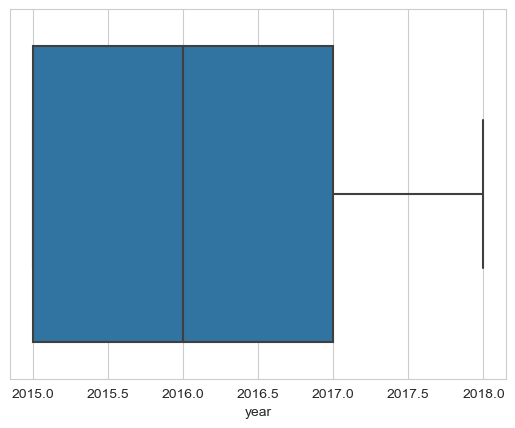

In [51]:
numerical_columns = ['AveragePrice','Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags','year']

for column in numerical_columns:
    sns.boxplot(x=df[column])
    plt.show()

In [52]:
df.shape

(18249, 12)

As we have done winsorization and clipped the extreme values, we can move towards  checking skeweness.

# Skewness

Here we will be checking for skewness and those values which are not in the range of -.5 to +.5, will be handling them.

We will be using boxcox transformation technique to handle the skewness in the column.

Boxcox transformation: It is a statistical technique used to transform a non-normal distribution into a distribution that closely resembles a normal distribution. It involves applying power transformation to the original data. It helps in improving the model's performance. Implementing the Box-Cox transformation in Python can be done using libraries such as SciPy or scikit-learn.

In [53]:
df.skew()

AveragePrice    0.287995
Total Volume    2.542806
4046            2.672476
4225            2.561327
4770            2.847946
Total Bags      2.513315
Small Bags      2.508598
Large Bags      2.392056
XLarge Bags     2.930463
year            0.215339
dtype: float64

Here we can see the columns like 'AveragePrice', and 'year' have no skewness, rest have skewness so lets handle them using Boxcox Transformation.

In [54]:
from scipy.stats import boxcox
from scipy.special import inv_boxcox

# create a list of columns to transform
columns = ['Total Volume','4046', '4225','4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags']

# apply BoxCox transformation to each column
for col in columns:
    data = df[col]
    # transform the data using BoxCox method
    data_transformed, lambda_val = boxcox(data+1)
    # replace the column with the transformed data
    df[col] = data_transformed

In [55]:
df.skew()

AveragePrice    0.287995
Total Volume    0.000348
4046           -0.037890
4225           -0.050249
4770            0.013944
Total Bags     -0.020863
Small Bags     -0.037447
Large Bags     -0.131937
XLarge Bags     0.787767
year            0.215339
dtype: float64

As we can see skewness is handled successfully possible handled.

# Encoding Categorical Columns

Here we will be using Label encoder method to encode the categorical column into numerical column.

Label Encoder: Label encoding assigns numerical labels to each unique category in a categorical variable using integers starting from 0.The labels are assigned in an ordinal manner, which means that the labels are ordered based on the alphabetical or numerical order of the categories.

For this we will be importing library from 'sklearn.preprocessing import LabelEncoder'

Lets encode categorical columns.

In [56]:
df.dtypes

AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type             object
year              int64
region           object
dtype: object

In [57]:
from sklearn.preprocessing import LabelEncoder

# Get all categorical columns
cat_columns = df.select_dtypes(include=['object']).columns.tolist()

# Initialize LabelEncoder
le = LabelEncoder()

# Apply LabelEncoder to each categorical column
for col in cat_columns:
    df[col] = le.fit_transform(df[col])

In [58]:
df.dtypes

AveragePrice    float64
Total Volume    float64
4046            float64
4225            float64
4770            float64
Total Bags      float64
Small Bags      float64
Large Bags      float64
XLarge Bags     float64
type              int64
year              int64
region            int64
dtype: object

In [59]:
df

AveragePrice  Total Volume      4046       4225      4770  Total Bags  \
0              1.33     11.044193  7.902768  15.748689  3.841803   10.589148   
1              1.35     10.887454  7.353653  15.352952  4.024595   10.709566   
2              0.93     11.651203  7.562349  17.173217  4.795606   10.500646   
3              1.08     11.249980  8.016068  16.312622  4.233554   10.047570   
4              1.28     10.815299  7.778968  15.317176  4.274841   10.130614   
...             ...           ...       ...        ...       ...         ...   
18244          1.63      9.725149  8.789298   9.347891  0.000000   11.188051   
18245          1.71      9.519435  8.082483  10.670820  0.000000   10.674791   
18246          1.87      9.510700  8.082722  10.112899  6.439977   10.693573   
18247          1.93      9.673097  8.405190  10.435528  6.438759   10.904322   
18248          1.62      9.749048  9.249568  10.046894  5.315721   11.028479   

       Small Bags  Large Bags  XLarge Bags  type  year  region  
0       11.713667    5.709915          0.0     0  2015       0  
1       11.860424    5.778375          0.0     0  2015       0  
2       11.603349    5.865578          0.0     0  2015       0  
3       11.040493    6.274701          0.0     0  2015       0  
4       11.125432    6.910526          0.0     0  2015       0  
...           ...         ...          ...   ...   ...     ...  
18244   12.405981    8.259984          0.0     1  2018      53  
18245   11.776556    7.755784          0.0     1  2018      53  
18246   11.850552    4.547066          0.0     1  2018      53  
18247   12.106636    4.784285          0.0     1  2018      53  
18248   12.261950    3.882454          0.0     1  2018      53  

[18249 rows x 12 columns]

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   AveragePrice  18249 non-null  float64
 1   Total Volume  18249 non-null  float64
 2   4046          18249 non-null  float64
 3   4225          18249 non-null  float64
 4   4770          18249 non-null  float64
 5   Total Bags    18249 non-null  float64
 6   Small Bags    18249 non-null  float64
 7   Large Bags    18249 non-null  float64
 8   XLarge Bags   18249 non-null  float64
 9   type          18249 non-null  int64  
 10  year          18249 non-null  int64  
 11  region        18249 non-null  int64  
dtypes: float64(9), int64(3)
memory usage: 1.7 MB


In [61]:
df.describe()

AveragePrice  Total Volume          4046          4225          4770  \
count  18249.000000  18249.000000  18249.000000  18249.000000  18249.000000   
mean       1.398391     11.274623     10.926657     14.144201      4.867070   
std        0.364208      2.172846      4.300432      4.853542      3.933265   
min        0.830000      7.758633      3.198373      5.412707      0.000000   
25%        1.100000      9.272535      7.654264     10.450950      0.000000   
50%        1.370000     11.555475     10.741743     14.515339      5.130097   
75%        1.660000     12.942475     14.464091     17.848792      8.474262   
max        2.110000     15.079587     18.347957     22.802598     11.110945   

         Total Bags    Small Bags    Large Bags   XLarge Bags          type  \
count  18249.000000  18249.000000  18249.000000  18249.000000  18249.000000   
mean      12.244327     13.110557     11.425577      0.837179      0.499918   
std        2.912190      3.825791      7.035690      1.194856      0.500014   
min        7.187762      6.482524      0.000000      0.000000      0.000000   
25%        9.870819      9.957274      6.198058      0.000000      0.000000   
50%       12.696960     13.604869     11.822142      0.000000      0.000000   
75%       14.180486     15.672842     16.862422      2.372470      1.000000   
max       17.549570     20.049735     23.264846      2.801253      1.000000   

               year        region  
count  18249.000000  18249.000000  
mean    2016.147899     26.495644  
std        0.939938     15.583788  
min     2015.000000      0.000000  
25%     2015.000000     13.000000  
50%     2016.000000     26.000000  
75%     2017.000000     40.000000  
max     2018.000000     53.000000

# Correlation Between Target and Independent Variable

Now here, we will be checking the correlation matrix which shows the relation between target and independent variable. We will get it by using df.corr() function. We will be finding the correlation to know which feature is more positive or negatively correlated to the target vaiable, which will be helping us for the feature selction to avoid overfitting. We will also be visualizing this correlation with using heatmap. And will be using seaborn library for heatmap.

In [62]:
# Let's check correlation

df.corr()

AveragePrice  Total Volume      4046      4225      4770  \
AveragePrice      1.000000     -0.604065 -0.582530 -0.492571 -0.520379   
Total Volume     -0.604065      1.000000  0.899757  0.935112  0.831852   
4046             -0.582530      0.899757  1.000000  0.790743  0.755222   
4225             -0.492571      0.935112  0.790743  1.000000  0.815013   
4770             -0.520379      0.831852  0.755222  0.815013  1.000000   
Total Bags       -0.591109      0.954752  0.827995  0.847481  0.782659   
Small Bags       -0.526035      0.926203  0.810624  0.817264  0.780697   
Large Bags       -0.506066      0.699730  0.628133  0.639990  0.572748   
XLarge Bags      -0.421527      0.657424  0.604629  0.617592  0.640083   
type              0.636165     -0.810427 -0.742390 -0.764220 -0.786790   
year              0.089539      0.081840  0.012468  0.007241 -0.038985   
region           -0.022418      0.096087  0.188879  0.074342  0.068834   

              Total Bags  Small Bags  Large Bags  XLarge Bags      type  \
AveragePrice   -0.591109   -0.526035   -0.506066    -0.421527  0.636165   
Total Volume    0.954752    0.926203    0.699730     0.657424 -0.810427   
4046            0.827995    0.810624    0.628133     0.604629 -0.742390   
4225            0.847481    0.817264    0.639990     0.617592 -0.764220   
4770            0.782659    0.780697    0.572748     0.640083 -0.786790   
Total Bags      1.000000    0.959577    0.745115     0.643865 -0.745302   
Small Bags      0.959577    1.000000    0.599082     0.634080 -0.745380   
Large Bags      0.745115    0.599082    1.000000     0.485748 -0.518344   
XLarge Bags     0.643865    0.634080    0.485748     1.000000 -0.674544   
type           -0.745302   -0.745380   -0.518344    -0.674544  1.000000   
year            0.208258    0.186102    0.189961     0.164535 -0.000032   
region          0.104025    0.096222    0.118420     0.014082 -0.000280   

                  year    region  
AveragePrice  0.089539 -0.022418  
Total Volume  0.081840  0.096087  
4046          0.012468  0.188879  
4225          0.007241  0.074342  
4770         -0.038985  0.068834  
Total Bags    0.208258  0.104025  
Small Bags    0.186102  0.096222  
Large Bags    0.189961  0.118420  
XLarge Bags   0.164535  0.014082  
type         -0.000032 -0.000280  
year          1.000000 -0.000055  
region       -0.000055  1.000000

In [63]:
correlation_matrix= df.corr()
region_correlation= correlation_matrix['region']
print(region_correlation)

correlation_matrix= df.corr()
averageprice_correlation= correlation_matrix['AveragePrice']
print(averageprice_correlation)

AveragePrice   -0.022418
Total Volume    0.096087
4046            0.188879
4225            0.074342
4770            0.068834
Total Bags      0.104025
Small Bags      0.096222
Large Bags      0.118420
XLarge Bags     0.014082
type           -0.000280
year           -0.000055
region          1.000000
Name: region, dtype: float64
AveragePrice    1.000000
Total Volume   -0.604065
4046           -0.582530
4225           -0.492571
4770           -0.520379
Total Bags     -0.591109
Small Bags     -0.526035
Large Bags     -0.506066
XLarge Bags    -0.421527
type            0.636165
year            0.089539
region         -0.022418
Name: AveragePrice, dtype: float64


# Visualization of Correlation Matrix

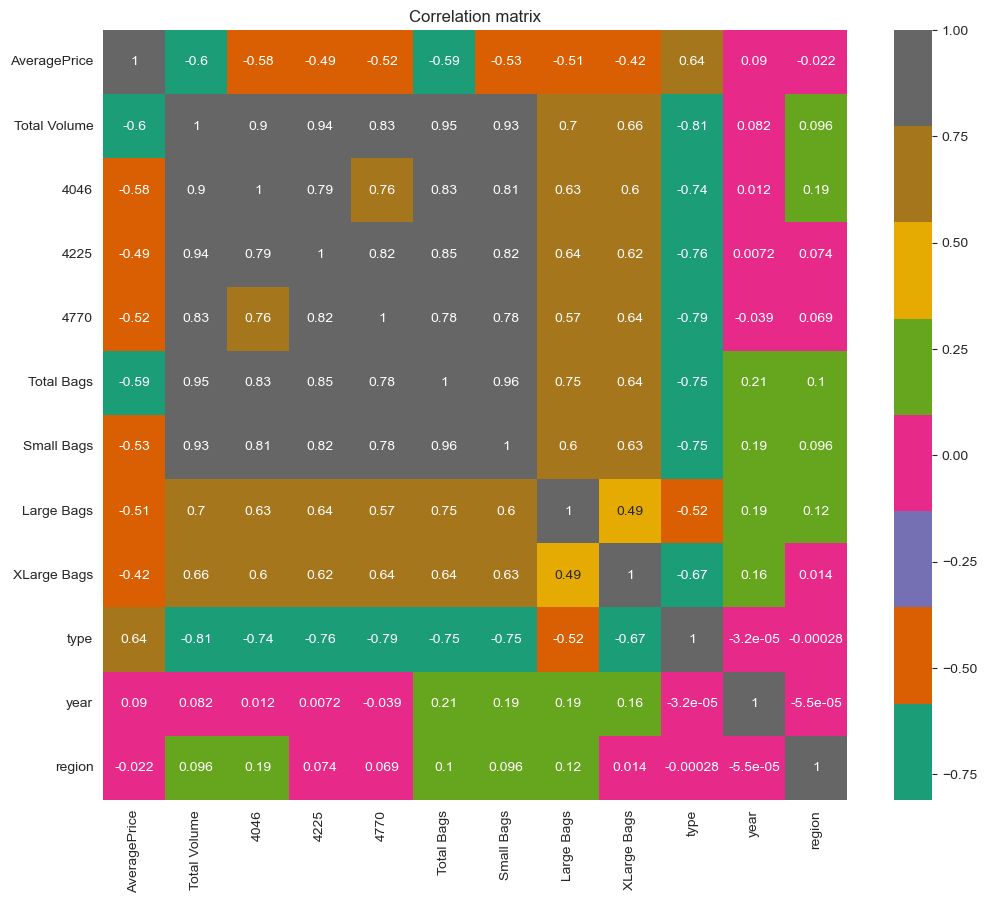

In [64]:
# Let's visualize the relation by using heatmap

correlation_matrix = df.corr()

plt.figure(figsize=(12,10))
sns.heatmap(correlation_matrix, annot=True, cmap='Dark2')
plt.title('Correlation matrix')
plt.show()

# Feature Engineering for Classification Tasks

Now we will be defining the target and independent variable, so that it will be clear what to predict on what basis. Then we will proceed with the feature scaling process using MinMaxScaler from sklearn.preprocessing.

Feature Scaling: It is performed to bring all the features to a similar scale or value range. It basically helps in improving the performance, convergence, and interpretability of ML algorithm. It ensures that all features should be treated equally during the modeling.

MinMaxScaler: This technique used to transform features by scaling them to a specified range which should be between 0-1. It ensures that all features are scaled proportionally. This technique is useful to preserv the shape of the original distribution while bringing all features to a common scale.

After this we will proceed with checking out for multicollinearity by finding the vif(variation inflation factor) values. For this we will be importing statsmodels.api and then from statsmodels.stats.outliers_inflation importing variance_inflation_factor to find out the vif values for the features.

A vif value 1 indicates no multicollinearity, while values greater than 1 suggest increasing multicollinearity. Generally , vif value above 5 or 10 is considered very high, so in that case we need to handle the multicollinearity.

If we will find any value above range we will be handling that by dropping one or two column with high multicollinearity, an will also be adding constant term for calculating vif. A constant term will allow and help us for a more accurate assessment of multicollinearity and its impact on predictor variable.

After handling multicollinearity issue, we will proceed with finding the Best Random State, which will ensure that further operations should be reproducible. Here we will be using  logistic regression algorithm for classification tasks to generate the best random state. The genrated best random score by this alogorithm should be used in all further runs for results reproducibility.

We will have to balance the target variable if there is any imbalance, and in that case we will be using RandomOverSampler technique.

Now we will be spliting the data into train and test so that we can train models on train data and can check its performance on test data. As We have a limited observation so, we will be taking "test size- 0.2", rest will be used as train data to train the model.

# Target and Independent variable

In [65]:
# Define Target and Features variables

y = df['region']
X = df.drop('region', axis=1)

print("Target variable name: ", y.name)
print("Target variable dimensions: ", y.shape)

print("\nFeatures variables names: ", list(X.columns))
print("Features variables dimensions: ", X.shape)

Target variable name:  region
Target variable dimensions:  (18249,)

Features variables names:  ['AveragePrice', 'Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year']
Features variables dimensions:  (18249, 11)


# Feature Scaling

In [66]:
from sklearn.preprocessing import MinMaxScaler

# Initialize scaler
scaler = MinMaxScaler()

# Apply to all columns
X_scaled = scaler.fit_transform(X)

# Create a new dataframe with the scaled features
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
print(X_scaled_df)

       AveragePrice  Total Volume      4046      4225      4770  Total Bags  \
0          0.390625      0.448788  0.310530  0.594367  0.345767    0.328262   
1          0.406250      0.427379  0.274283  0.571610  0.362219    0.339883   
2          0.078125      0.531703  0.288059  0.676284  0.431611    0.319721   
3          0.195313      0.476898  0.318008  0.626796  0.381026    0.275995   
4          0.351563      0.417523  0.302358  0.569553  0.384741    0.284010   
...             ...           ...       ...       ...       ...         ...   
18244      0.625000      0.268615  0.369048  0.226291  0.000000    0.386061   
18245      0.687500      0.240515  0.322392  0.302366  0.000000    0.336527   
18246      0.812500      0.239322  0.322408  0.270283  0.579607    0.338340   
18247      0.859375      0.261505  0.343694  0.288836  0.579497    0.358679   
18248      0.617188      0.271879  0.399430  0.266487  0.478422    0.370661   

       Small Bags  Large Bags  XLarge Bags  type  y

# VIF(Variance Inflation Factor)

In [67]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

# add a constant column to features
X_scaled_df = sm.add_constant(X_scaled_df)

# Calculate VIF for each feature
vif = pd.DataFrame()
vif["X"] = X_scaled_df.columns
vif["VIF"] = [variance_inflation_factor(X_scaled_df.values, i) for i in range(X_scaled_df.shape[1])]

# Print the VIF dataframe
print(vif)

               X        VIF
0          const  28.085871
1   AveragePrice   2.221486
2   Total Volume  76.153803
3           4046   7.813931
4           4225  15.284840
5           4770   4.207360
6     Total Bags  50.236923
7     Small Bags  22.729393
8     Large Bags   3.840315
9    XLarge Bags   2.128466
10          type   4.314245
11          year   1.424025


In [68]:
X_scaled = X_scaled_df.drop(["Total Volume", "Total Bags"], axis=1)

X_scaled['const']=1

# Calculate VIF for each feature
vif = pd.DataFrame()
vif["X"] = X_scaled.columns
vif["VIF"] = [variance_inflation_factor(X_scaled.values, i) for i in range(X_scaled.shape[1])]

# Print the VIF dataframe
print(vif)

              X        VIF
0         const  27.772456
1  AveragePrice   1.995966
2          4046   4.014304
3          4225   4.872160
4          4770   4.182512
5    Small Bags   4.886596
6    Large Bags   2.141219
7   XLarge Bags   2.117991
8          type   4.109249
9          year   1.362756


We have handled mostly vif values by dropping features having highest vif which is showing multicollinearity, and as such way we have handled multi collinearity.

In [69]:
#  Let's check value count of target variable

y.value_counts()

0     338
40    338
29    338
30    338
31    338
32    338
33    338
34    338
35    338
36    338
37    338
38    338
39    338
41    338
1     338
42    338
43    338
44    338
45    338
46    338
47    338
48    338
49    338
50    338
51    338
52    338
28    338
27    338
26    338
25    338
2     338
3     338
4     338
5     338
6     338
7     338
8     338
9     338
10    338
11    338
12    338
13    338
14    338
15    338
16    338
17    338
18    338
19    338
20    338
21    338
22    338
23    338
24    338
53    335
Name: region, dtype: int64

# Best Random State

In [70]:
# Let's find Best random state

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Define the features and target variables
X = df.drop('region', axis=1)
y = df['region']

# Initialize variables to store the best accuracy score and corresponding random state
best_score = 0
best_state = 0

# Loop through different random states
for state in range(1, 101):
    
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=state)

    # Initialize the models
    lr = LogisticRegression()
    dt = DecisionTreeClassifier()
    rf = RandomForestClassifier()

    # Train the models on the training data
    lr.fit(X_train, y_train)
    dt.fit(X_train, y_train)
    rf.fit(X_train, y_train)

    # Test the models on the testing data and get the accuracy scores
    lr_score = accuracy_score(y_test, lr.predict(X_test))
    dt_score = accuracy_score(y_test, dt.predict(X_test))
    rf_score = accuracy_score(y_test, rf.predict(X_test))

    # Get the maximum accuracy score and corresponding random state
    if lr_score > best_score:
        best_score = lr_score
        best_state = state
        best_model = 'Logistic Regression'
    if dt_score > best_score:
        best_score = dt_score
        best_state = state
        best_model = 'Decision Tree Classifier'
    if rf_score > best_score:
        best_score = rf_score
        best_state = state
        best_model = 'Random Forest Classifier'

print(f'Best accuracy score: {best_score}')
print(f'Best model: {best_model}')
print(f'Max random state: {best_state}')

Best accuracy score: 0.9123287671232877
Best model: Random Forest Classifier
Max random state: 66


Best accuracy score is 0.9123287671232877 on Best Random State 66

# Split The Data into Test and Train

In [71]:
# Split the data into test and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=66)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(14599, 11)
(3650, 11)
(14599,)
(3650,)


# Oversampling

In [71]:
from imblearn.over_sampling import RandomOverSampler

# Define the target variable from the features
X = df.drop('region', axis=1)
y = df['region']

# Instantiate RandomOverSampler
ros = RandomOverSampler(random_state=0)

# Fit and resample the data
X_resampled, y_resampled = ros.fit_resample(X, y)

# Check the value counts of the resampled target variable
print(y_resampled.value_counts())

0     338
40    338
29    338
30    338
31    338
32    338
33    338
34    338
35    338
36    338
37    338
38    338
39    338
41    338
1     338
42    338
43    338
44    338
45    338
46    338
47    338
48    338
49    338
50    338
51    338
52    338
28    338
27    338
26    338
25    338
2     338
3     338
4     338
5     338
6     338
7     338
8     338
9     338
10    338
11    338
12    338
13    338
14    338
15    338
16    338
17    338
18    338
19    338
20    338
21    338
22    338
23    338
24    338
53    338
Name: region, dtype: int64


# Modelling

Classification Algorithm

Now we will be start modelling process which involve the train the model on training dataset and make it ready for testing or prediction phase. For modelling we will be using classification algorithm as this is the classification problem, where we have to predict the region.

We will be using different algorithms to check which one is performing best on both testing and test data depends on this specific dataset and make it ready for making prediction on unseen data. Algorithms will be used in this problems are: Logistic Regression will be importing from sklearn.linear_model, DecisionTreeClassifier will be importing from sklearn.tree, RandomForestClassifier,ExtraTreeClassifier, GradientBoostClassifier, AdaBoostClassifier, Bagging Classifier will be importing from sklearn.ensemble, GaussianNB will be importing from sklearn.naive_bayes, KNeighborsClassifier will be importing from sklearn.neighbors.

We will be train our model on each algorithms and will be evaluating the accuracy and the classification report. per On this basis we will first find out which one will be performing well, then further for more accuracy we will be finding out cross validation score and will find out the difference between the accuracy score and the CV score, lesser the difference accurate the performance, and finally we will be using hyperparameter tuning to hypertune the best three performing model base on lesser difference to check their performance. At last we will be saving that model for future prediction on unseen data.

We will be importing cross_val_score from sklearn.models_selection

In [72]:
# Importing Necessary Libraries

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report

# DecisionTreeClassifier (DTC)

In [73]:
# Initialize and train model
model = DecisionTreeClassifier(random_state=66)
model.fit(X_train, y_train)

# Make predictions on test set
y_pred = model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy: ", accuracy)
print("Classification report: \n", report)

Accuracy:  0.7991780821917808
Classification report: 
               precision    recall  f1-score   support

           0       0.77      0.72      0.75        65
           1       0.60      0.67      0.63        51
           2       0.94      0.93      0.94        72
           3       0.76      0.80      0.78        66
           4       0.78      0.85      0.82        68
           5       0.78      0.72      0.75        82
           6       0.90      0.93      0.92        70
           7       0.89      0.83      0.86        65
           8       0.92      0.94      0.93        63
           9       0.85      0.77      0.80        94
          10       0.73      0.79      0.76        57
          11       0.85      0.89      0.87        63
          12       0.93      0.84      0.88        74
          13       0.71      0.72      0.72        58
          14       0.76      0.71      0.74        63
          15       0.94      0.91      0.93        75
          16       0.85   

 Accuracy score of this model is 80%

# RandomForestClassifier (RFC)

In [74]:
# Initialize and train model
model = RandomForestClassifier(random_state=66)
model.fit(X_train, y_train)

# Make predictions on test set
y_pred = model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy: ", accuracy)
print("Classification report: \n", report)

Accuracy:  0.9093150684931507
Classification report: 
               precision    recall  f1-score   support

           0       0.83      0.92      0.88        65
           1       0.80      0.84      0.82        51
           2       1.00      0.97      0.99        72
           3       0.90      0.86      0.88        66
           4       0.90      0.97      0.94        68
           5       0.90      0.77      0.83        82
           6       0.95      0.99      0.97        70
           7       0.92      0.88      0.90        65
           8       0.98      0.97      0.98        63
           9       0.93      0.88      0.91        94
          10       0.84      0.93      0.88        57
          11       0.94      0.98      0.96        63
          12       0.95      0.99      0.97        74
          13       0.80      0.84      0.82        58
          14       0.90      0.97      0.93        63
          15       1.00      1.00      1.00        75
          16       0.98   

Accuracy score of the model is 91%

# ExtraTreeClassifier (ETC)

In [75]:
# Initialize and train model
model = ExtraTreesClassifier(random_state=66)
model.fit(X_train, y_train)

# Make predictions on test set
y_pred = model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy: ", accuracy)
print("Classification report: \n", report)

Accuracy:  0.915068493150685
Classification report: 
               precision    recall  f1-score   support

           0       0.90      0.95      0.93        65
           1       0.81      0.84      0.83        51
           2       1.00      1.00      1.00        72
           3       0.90      0.85      0.88        66
           4       0.94      0.97      0.96        68
           5       0.96      0.79      0.87        82
           6       0.94      0.97      0.96        70
           7       0.93      0.88      0.90        65
           8       0.97      0.95      0.96        63
           9       0.93      0.88      0.91        94
          10       0.85      0.88      0.86        57
          11       0.91      0.95      0.93        63
          12       0.93      1.00      0.96        74
          13       0.82      0.84      0.83        58
          14       0.88      0.97      0.92        63
          15       1.00      0.99      0.99        75
          16       0.98    

Accuracy of this model is 92%

# GradientBoostClassifier(GBC)

In [76]:
# Initialize and train model
model = GradientBoostingClassifier(random_state=66)
model.fit(X_train, y_train)

# Make predictions on test set
y_pred = model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy: ", accuracy)
print("Classification report: \n", report)

Accuracy:  0.8380821917808219
Classification report: 
               precision    recall  f1-score   support

           0       0.86      0.83      0.84        65
           1       0.72      0.75      0.73        51
           2       0.99      0.93      0.96        72
           3       0.80      0.73      0.76        66
           4       0.88      0.94      0.91        68
           5       0.84      0.66      0.74        82
           6       0.88      0.97      0.93        70
           7       0.95      0.80      0.87        65
           8       0.97      0.92      0.94        63
           9       0.84      0.82      0.83        94
          10       0.70      0.86      0.77        57
          11       0.84      0.86      0.85        63
          12       0.96      0.93      0.95        74
          13       0.81      0.72      0.76        58
          14       0.79      0.90      0.84        63
          15       0.99      0.92      0.95        75
          16       0.89   

Accuracy of this model is 84%

# Bagging Classifier

In [77]:
# Initialize and train model
model = BaggingClassifier(base_estimator=DecisionTreeClassifier(),
                          n_estimators=100, random_state=66)
model.fit(X_train, y_train)

# Make predictions on test set
y_pred = model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy: ", accuracy)
print("Classification report: \n", report)

Accuracy:  0.8871232876712328
Classification report: 
               precision    recall  f1-score   support

           0       0.81      0.91      0.86        65
           1       0.80      0.84      0.82        51
           2       0.99      0.96      0.97        72
           3       0.91      0.88      0.89        66
           4       0.89      0.94      0.91        68
           5       0.91      0.74      0.82        82
           6       0.93      0.97      0.95        70
           7       0.95      0.89      0.92        65
           8       0.95      0.98      0.97        63
           9       0.91      0.89      0.90        94
          10       0.78      0.93      0.85        57
          11       0.92      0.92      0.92        63
          12       0.95      0.96      0.95        74
          13       0.82      0.81      0.82        58
          14       0.87      0.95      0.91        63
          15       0.97      0.96      0.97        75
          16       0.95   

Accuracy of this model is 89%

# KNeighbors Classifier (KNN)

In [78]:
# Initialize and train model
model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)

# Make predictions on test set
y_pred = model.predict(X_test)

# Evaluate model performance
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print("Accuracy: ", accuracy)
print("Classification report: \n", report)

Accuracy:  0.8536986301369863
Classification report: 
               precision    recall  f1-score   support

           0       0.86      0.92      0.89        65
           1       0.62      0.78      0.70        51
           2       0.99      0.94      0.96        72
           3       0.84      0.85      0.84        66
           4       0.88      0.93      0.90        68
           5       0.87      0.71      0.78        82
           6       0.88      0.97      0.93        70
           7       0.85      0.85      0.85        65
           8       0.97      0.94      0.95        63
           9       0.87      0.81      0.84        94
          10       0.77      0.88      0.82        57
          11       0.89      0.90      0.90        63
          12       0.88      0.97      0.92        74
          13       0.75      0.81      0.78        58
          14       0.81      0.95      0.88        63
          15       1.00      0.99      0.99        75
          16       0.92   

Accuracy of this model is 85%

# Cross Validation Score( CV Score)

In [79]:
# Import necessary library

from sklearn.model_selection import cross_val_score

# DecisionTreeClassification(DTC)

In [80]:
model = DecisionTreeClassifier(random_state=66)

# perform 5-fold cross-validation
cv_scores = cross_val_score(model, X_train, y_train, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", np.mean(cv_scores))

# fit the model on the entire training set
model.fit(X_train, y_train)

# make predictions on the test set
y_pred = model.predict(X_test)

# print the accuracy score and classification report
print("Accuracy:", accuracy_score(y_test, y_pred))

# print the difference between the accuracy score and mean cross-validation score
print("Difference between accuracy score and cross-validation score is:", accuracy_score(y_test, y_pred) - np.mean(cv_scores))

Cross-Validation Scores: [0.76849315 0.78664384 0.79041096 0.78561644 0.77458034]
Mean CV Score: 0.7811489438586118
Accuracy: 0.7991780821917808
Difference between accuracy score and cross-validation score is: 0.018029138333168993


# RandomForestClassification(RFC)

In [81]:
model = RandomForestClassifier(n_estimators=100, random_state=66)

# perform 5-fold cross-validation
cv_scores = cross_val_score(model, X_train, y_train, cv=5)

# print the cross-validation scores and mean score
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", np.mean(cv_scores))

# fit the model on the entire training set
model.fit(X_train, y_train)

# make predictions on the test set
y_pred = model.predict(X_test)

# print the accuracy score and classification report
print("Accuracy:", accuracy_score(y_test, y_pred))

# print the difference between the accuracy score and mean cross-validation score
print("Difference between accuracy score and cross-validation score is:", accuracy_score(y_test, y_pred) - np.mean(cv_scores))

Cross-Validation Scores: [0.89315068 0.89863014 0.89554795 0.89726027 0.89242891]
Mean CV Score: 0.8954035910215076
Accuracy: 0.9093150684931507
Difference between accuracy score and cross-validation score is: 0.013911477471643119


# ExtraTreeClassification(ETC)

In [82]:
model = ExtraTreesClassifier(n_estimators=100, random_state=66)

# perform 5-fold cross-validation
cv_scores = cross_val_score(model, X_train, y_train, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", np.mean(cv_scores))

# fit the model on the entire training set
model.fit(X_train, y_train)

# make predictions on the test set
y_pred = model.predict(X_test)

# print the accuracy score and classification report
print("Accuracy:", accuracy_score(y_test, y_pred))

# print the difference between the accuracy score and mean cross-validation score
print("Difference between accuracy score and cross-validation score is:", accuracy_score(y_test, y_pred) - np.mean(cv_scores))

Cross-Validation Scores: [0.91232877 0.91472603 0.90376712 0.91130137 0.90510449]
Mean CV Score: 0.9094455551019068
Accuracy: 0.915068493150685
Difference between accuracy score and cross-validation score is: 0.005622938048778114


# GradientBoostClassification(GBC)

In [83]:
model = GradientBoostingClassifier(random_state=66)

# perform 5-fold cross-validation
cv_scores = cross_val_score(model, X_train, y_train, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", np.mean(cv_scores))

# fit the model on the entire training set
model.fit(X_train, y_train)

# make predictions on the test set
y_pred = model.predict(X_test)

# print the accuracy score and classification report
print("Accuracy:", accuracy_score(y_test, y_pred))

# print the difference between the accuracy score and mean cross-validation score
print("Difference between accuracy score and cross-validation score is:", accuracy_score(y_test, y_pred) - np.mean(cv_scores))

Cross-Validation Scores: [0.82363014 0.82431507 0.83116438 0.83150685 0.82528263]
Mean CV Score: 0.8271798138788382
Accuracy: 0.8380821917808219
Difference between accuracy score and cross-validation score is: 0.010902377901983673


# Bagging Classification

In [84]:
model = BaggingClassifier(random_state=66)

# perform 5-fold cross-validation
cv_scores = cross_val_score(model, X_train, y_train, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", np.mean(cv_scores))

# fit the model on the entire training set
model.fit(X_train, y_train)

# make predictions on the test set
y_pred = model.predict(X_test)

# print the accuracy score and classification report
print("Accuracy:", accuracy_score(y_test, y_pred))

# print the difference between the accuracy score and mean cross-validation scor
print("Difference between accuracy score and cross-validation score is:", accuracy_score(y_test, y_pred) - np.mean(cv_scores))

Cross-Validation Scores: [0.84041096 0.85171233 0.85410959 0.84691781 0.84857828]
Mean CV Score: 0.8483457930328926
Accuracy: 0.8616438356164383
Difference between accuracy score and cross-validation score is: 0.013298042583545722


# KNeighborsClassification(KNN)

In [85]:
model = KNeighborsClassifier()

# perform 5-fold cross-validation
cv_scores = cross_val_score(model, X_train, y_train, cv=5)
print("Cross-Validation Scores:", cv_scores)
print("Mean CV Score:", np.mean(cv_scores))

# fit the model on the entire training set
model.fit(X_train, y_train)

# make predictions on the test set
y_pred = model.predict(X_test)

# print the accuracy score and classification report
print("Accuracy:", accuracy_score(y_test, y_pred))

# print the difference between the accuracy score and mean cross-validation score
print("Difference between accuracy score and cross-validation score is:", accuracy_score(y_test, y_pred) - np.mean(cv_scores))

Cross-Validation Scores: [0.82945205 0.83287671 0.83630137 0.83184932 0.83316204]
Mean CV Score: 0.832728298769986
Accuracy: 0.8536986301369863
Difference between accuracy score and cross-validation score is: 0.020970331367000328


Based on the differences between accuracy score and cross-validation score, the model with the lowest score (i.e., the smallest difference) is ExtraTreeClassification with a score of 0.005622938048778114. This indicates that the performance of the model on the test set is consistent with its performance during cross-validation, which is a good sign of a well-performing model.

ExtraTree Classifier is the best performing model here yet.

Let's perform Hyperparameter tuning on all models to check the accuracy on the basis of least difference and see which model perform well, or which decreases performance.

# Hyperparameter Tuning

In [86]:
# Import necessary library
from sklearn.model_selection import RandomizedSearchCV

# ExtraTreeClassification(ETC)

In [87]:
from scipy.stats import randint, uniform
from sklearn.ensemble import ExtraTreesClassifier

# Define the parameter space for hyperparameter tuning
param_dist = {"max_depth": [int, None],
              "n_estimators": [int, 10] ,
              "max_samples": [None]+list(uniform(0.1, 1).rvs(10)),
              "max_features": uniform(0.1, 0.9)}

# Initialize the RandomForestClassifier model
etc = ExtraTreesClassifier()

# Initialize the RandomizedSearchCV object
random_etc = RandomizedSearchCV(etc, param_distributions=param_dist, n_iter=50, cv=5, random_state=66)

# Fit the RandomizedSearchCV object to the training data
random_etc.fit(X_train, y_train)

# Print the best hyperparameters and corresponding score
print("Best Hyperparameters (RFC): ", random_etc.best_params_)
print("Best Score (RFC): ", random_etc.best_score_)

Best Hyperparameters (RFC):  {'max_depth': None, 'max_features': 0.7529780707611672, 'max_samples': None, 'n_estimators': 10}
Best Score (RFC):  0.8889647890298329


After performing hyperparameter tuning  on ExtraTreeClassifier we can see that performance of model is decreased. Accuracy of ExtraTree Classification is 89% earlier it was 92% .

# GradientBoostingClassification(GBC)

In [89]:
from scipy.stats import randint, uniform

# Create the model
gbc = GradientBoostingClassifier()

# Define the parameter distributions to sample from
param_dist = {
    "max_depth": [3, 4, 5, None],
    "n_estimators": randint(10, 50),
    "learning_rate": uniform(0.01, 0.1),
    "max_features": uniform(0.1, 0.5)}

# Create the randomized search CV object
gbc_random = RandomizedSearchCV(gbc, param_distributions=param_dist, cv=5, n_iter=20, random_state=66)

# Fit the randomized search CV object on the data
gbc_random.fit(X_train, y_train)

# Print the best parameters and best score
print("Best parameters:", gbc_random.best_params_)
print("Best score:", gbc_random.best_score_)

Best parameters: {'learning_rate': 0.025428757813127582, 'max_depth': None, 'max_features': 0.23588047535227782, 'n_estimators': 23}
Best score: 0.8501260518004383


After performing hyperparameter tuning on GradientBoostingClassifier we can see that performance of model is increased. Accuracy of  GradientBoostingClassification is 85% earlier it was 83.8% .

# Bagging Classification

In [90]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from scipy.stats import randint, uniform

# Define the parameter space for hyperparameter tuning
param_dist = {"base_estimator__max_depth": [3, 5, None],
              "n_estimators": randint(10, 200),
              "max_samples": uniform(0.1, 1),
              "max_features": uniform(0.1, 1)}

# Initialize the base estimator for BaggingClassifier
dt = DecisionTreeClassifier()

# Initialize the BaggingClassifier model
bc = BaggingClassifier(dt)

# Initialize the RandomizedSearchCV object
random_bc = RandomizedSearchCV(bc, param_distributions=param_dist, n_iter=50, cv=5, random_state=66)

# Fit the RandomizedSearchCV object to the training data
random_bc.fit(X_train, y_train)

# Print the best hyperparameters and corresponding score
print("Best Hyperparameters: ", random_bc.best_params_)
print("Best Score: ", random_bc.best_score_)

Best Hyperparameters:  {'base_estimator__max_depth': None, 'max_features': 0.8089636692264982, 'max_samples': 0.9467718812694924, 'n_estimators': 117}
Best Score:  0.8884167734305706


After performing hyperparameter tuning  on BaggingClassifier we can see that performance of model is slightly increasedbut yes maintain consistency. Accuracy of Bagging Classification is 88.8% earlier it was 88.7% .

# RandomForestClassification (RFC)

In [91]:
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import randint, uniform

# Define the parameter space for hyperparameter tuning
param_dist = {"max_depth": [int, None],
              "n_estimators": [int, 10] ,
              "max_samples": [None]+list(uniform(0.1, 1).rvs(10)),
              "max_features": uniform(0.1, 0.9)}

# Initialize the RandomForestClassifier model
rfc = RandomForestClassifier()

# Initialize the RandomizedSearchCV object
random_rfc = RandomizedSearchCV(rfc, param_distributions=param_dist, n_iter=50, cv=5, random_state=66)

# Fit the RandomizedSearchCV object to the training data
random_rfc.fit(X_train, y_train)

# Print the best hyperparameters and corresponding score
print("Best Hyperparameters (RFC): ", random_rfc.best_params_)
print("Best Score (RFC): ", random_rfc.best_score_)

Best Hyperparameters (RFC):  {'max_depth': None, 'max_features': 0.38519447302120813, 'max_samples': 0.988807677517579, 'n_estimators': 10}
Best Score (RFC):  0.858688563826043


After performing hyperparameter tuning  on RandomForestClassifier we can see that performance of model is decreased. Accuracy of RandomForest Classification is 86% earlier it was 91% .

# DecisionTreeClassification(DTC)

In [92]:
# Create the model
dtc = DecisionTreeClassifier()

# Define the parameter distributions to sample from
param_dist = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [2, 4, 6, 8, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the randomized search CV object
dtc_random = RandomizedSearchCV(dtc, param_distributions=param_dist, cv=5, n_iter=50, random_state=66)

# Fit the randomized search CV object on the data
dtc_random.fit(X_train, y_train)

# Print the best parameters and best score
print("Best parameters:", dtc_random.best_params_)
print("Best score:", dtc_random.best_score_)

Best parameters: {'min_samples_split': 2, 'min_samples_leaf': 1, 'max_depth': None, 'criterion': 'gini'}
Best score: 0.7799155978543976


After performing hyperparameter tuning on DecisionTreeClassifier we can see that performance of model is decreased. Accuracy of RandomForest Classification is 78% earlier it was 80% .

# KNeighborsClassification(KNN)

In [93]:
from scipy.stats import randint, uniform

# Define the parameter space for hyperparameter tuning
param_dist = {"n_neighbors": randint(1, 20),
              "weights": ['uniform', 'distance'],
              "p": [1, 2]}

# Initialize the RandomForestClassifier model
knn = KNeighborsClassifier()

# Initialize the RandomizedSearchCV object
random_knn = RandomizedSearchCV(knn, param_distributions=param_dist, n_iter=50, cv=5, random_state=66)

# Fit the RandomizedSearchCV object to the training data
random_knn.fit(X_train, y_train)

# Print the best hyperparameters and corresponding score
print("Best Hyperparameters (RFC): ", random_knn.best_params_)
print("Best Score (RFC): ", random_knn.best_score_)

Best Hyperparameters (RFC):  {'n_neighbors': 3, 'p': 1, 'weights': 'distance'}
Best Score (RFC):  0.8654699723587079


After performing hyperparameter tuning  on KNeighborsClassifier we can see that performance of model is increased. Accuracy of KNeighbors Classification is 86.5% earlier it was 85.3% .

So, finally after performing techniques like modelling algorithm, CVscore, and finally hyperparameter tuning, It is concluded that three model shows improvement and consistency i.e., GradientBoostingClassification, Bagging Classification and KNeighborsCllassification.

Out of these, it is concluded that the Bagging Classification is the best performing and fitted model because it increases its accuracy and maintain consistent performance then other two and it has highest accuracy score. So, I will save it for future prediction on unseen data.

# Save the Classification Model

In [94]:
# Lets save best performing model

import pickle


# train your model and obtain 'model' object
model= BaggingClassifier(base_estimator= DecisionTreeClassifier())
model.fit(X_train, y_train)


# save the model using pickle
model_data= {'model': model}
with open('Avocado_classi_model.pickle', 'wb') as f:
    pickle.dump(model, f)

# Regression Tasks

For, Regression task, we will be starting with defining target and independent variable, followed by finding best random state and then will proceed with regression algorithm, and to check accuray we will be find CV score and then hypertune the models, to cgeck their performance and consistency.

# Target and Independent Variable

In [95]:
# Define target and Independent variable

y = df['AveragePrice']
X = df.drop('AveragePrice', axis=1)

print("Target variable name: ", y.name)
print("Target variable dimensions: ", y.shape)

print("\nFeatures variables names: ", list(X.columns))
print("Features variables dimensions: ", X.shape)

Target variable name:  AveragePrice
Target variable dimensions:  (18249,)

Features variables names:  ['Total Volume', '4046', '4225', '4770', 'Total Bags', 'Small Bags', 'Large Bags', 'XLarge Bags', 'type', 'year', 'region']
Features variables dimensions:  (18249, 11)


In [96]:
y.value_counts()

0.83    975
2.11    935
1.15    202
1.18    199
1.08    194
       ... 
2.04     42
2.03     39
2.08     38
2.05     38
2.10     26
Name: AveragePrice, Length: 129, dtype: int64

# Best Random State

In [97]:
# Lets find the best random state

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# Split the data into training and testing sets using different random states
best_random_state = None
best_r2_score = -1

for random_state in range(100):
    X_train, X_test, y_train, y_test = train_test_split(df.drop('AveragePrice', axis=1), df['AveragePrice'], test_size=0.2, random_state=random_state)
    
    # Fit the linear regression model
    model = RandomForestRegressor()
    model.fit(X_train, y_train)
    
    # Evaluate the model on the test set
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    
    # Check if this random state gives a better R2 score
    if r2 > best_r2_score:
        best_r2_score = r2
        best_random_state = random_state

print("Best random state:", best_random_state)
print("Best R^2 score:", best_r2_score)

Best random state: 21
Best R^2 score: 0.8684236189889722


Here, using linear regression algorithm we find the Best R^2 score is 0.8684236189889722 at best random state 21

# Split The Data

In [98]:
# Let's split the data into test and train

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=21)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(14599, 10)
(3650, 10)
(14599,)
(3650,)


# Modelling

Regression algorithm

Now we will be start modelling process which involve the train the model on training dataset and make it ready for testing or prediction phase. For modelling we will be using regression algorithm as this is the regression problem, where we have to predict the number of wins(continous).

We will be using different algorithms to check which one is performing best on both testing and test data depends on this specific dataset and make it ready for making prediction on unseen data. Algorithms will be used in this problems are: Linear Regression, Lasso, Ridge, and ElasticNet will be importing from sklearn.linear_model, DecisionTree Regression will be importing from sklearn.tree RandomForest Regression, and GradientBoost Regression will be importing from sklearn.ensemble, XGB from xgboost, and KNeighbors Regression from sklearn.neighbors.

We will be train our model on each algorithms and will be evaluating the R2 score for test data and train data, Mean absolute error(MAE), Mean square error(MSE), and Root mean square error(RMSE) to check the accuracy and performance. On this basis we will first find out which one will be performing well, then further for more accuracy we will be finding out cross validation score and will find out the difference between the R2 score and mean cv score, lesser the difference accurate the performance, and finally we will be using hyperparameter tuning to hypertune the best three performing model base on lesser difference to check their performance. At last we will be saving that model for future prediction on unseen data.

We will be importing cross_val_score from sklearn.models_selection

Lets import necessary library before that

In [99]:
# Import necessary libraries

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
import xgboost as xgb
from sklearn.neighbors import KNeighborsRegressor

# Linear Regression(LR)

In [100]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize the linear regression model and fit the training data
lr = LinearRegression()
lr.fit(X_train, y_train)

# Make predictions on the test data
y_pred = lr.predict(X_test)

# Calculate the evaluation metrics
r2_test = r2_score(y_test, y_pred)
r2_train = r2_score(y_train, lr.predict(X_train))
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

# Print the evaluation metrics
print("Root squared on test data:", np.sqrt(r2_test))
print("MAE:", mae)
print("MSE:", mse)
print("Root mean square error:", rmse)
print("Root squared on training data:", np.sqrt(r2_train))

Root squared on test data: 1.0
MAE: 5.128926203076545e-16
MSE: 3.988813030945868e-31
Root mean square error: 6.315705052443368e-16
Root squared on training data: 1.0


Here we can see model is performing excellent on both training and testing data i.e., R2 score for trainig and testing data is 100%

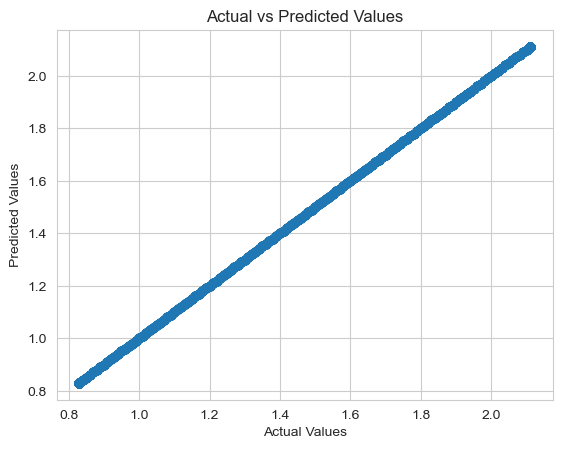

In [101]:
# Plotting the actual vs predicted values on the test data
plt.scatter(y_test, y_pred)
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.title('Actual vs Predicted Values')
plt.show()

# Lasso Regression(L1)

In [102]:
# Initialize the Lasso Regression model and fit the training data
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)

# Make predictions using the trained model on both train and test data
y_train_pred = lasso.predict(X_train)
y_test_pred = lasso.predict(X_test)

# Calculate R-squared for train and test data 
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Calculate mean absolute error for test data
mae_test = mean_absolute_error(y_test, y_test_pred)

# Calculate mean squared error for test data
mse_test = mean_squared_error(y_test, y_test_pred)

# Calculate root mean squared error for test data
rmse_test = np.sqrt(mse_test)

print("Root squared on test data:", r2_test)
print("MAE on test data:", mae_test)
print("MSE on test data:", mse_test)
print("RMSE on test data:", rmse_test)
print("Root squared on training data:", r2_train)

Root squared on test data: 0.10371074829191573
MAE on test data: 0.28810258435390235
MSE on test data: 0.11866460871019213
RMSE on test data: 0.3444772978153889
Root squared on training data: 0.10471914535104754


Here we can see model is performing bad on both training and testing data i.e., R2 score for trainig and testing data is 10%

# Ridge Regression(L2)

In [103]:
# Initialize the Ridge Regression model and fit the training data 
ridge = Ridge(alpha=0.1)
ridge.fit(X_train, y_train)

# Make prediction on both test and train data
y_test_pred = ridge.predict(X_test)
y_train_pred = ridge.predict(X_train)

# Calculate R-squared for train and test data 
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Calculate mean absolute error for test data
mae_test = mean_absolute_error(y_test, y_test_pred)

# Calculate mean squared error for test data
mse_test = mean_squared_error(y_test, y_test_pred)

# Calculate root mean squared error for test data
rmse_test = np.sqrt(mse_test)

print("Root squared on test data:", r2_test)
print("MAE on test data:", mae_test)
print("MSE on test data:", mse_test)
print("RMSE on test data:", rmse_test)
print("Root squared on training data:", r2_train)

Root squared on test data: 0.9999999853659338
MAE on test data: 3.5174463924304794e-05
MSE on test data: 1.93748361767529e-09
RMSE on test data: 4.401685606305032e-05
Root squared on training data: 0.9999999856724356


Here we can see model is performing excellent on both training and testing data i.e., R2 score for trainig and testing data is 99%

# ElasticNet Regression

In [104]:
# Initialize the Elastic Net Regression model and fit the training data
elastic_net = ElasticNet(alpha=0.01, l1_ratio=0.5)
elastic_net.fit(X_train, y_train)

# Make predictions using the trained model on both train and test data
y_train_pred = elastic_net.predict(X_train)
y_test_pred = elastic_net.predict(X_test)

# Calculate R-squared for train and test data 
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Calculate mean absolute error for test data
mae_test = mean_absolute_error(y_test, y_test_pred)

# Calculate mean squared error for test data
mse_test = mean_squared_error(y_test, y_test_pred)

# Calculate root mean squared error for test data
rmse_test = np.sqrt(mse_test)

print("Root squared on test data:", r2_test)
print("MAE on test data:", mae_test)
print("MSE on test data:", mse_test)
print("RMSE on test data:", rmse_test)
print("Root squared on training data:", r2_train)

Root squared on test data: 0.9874708288052962
MAE on test data: 0.03324725699872504
MSE on test data: 0.001658805117264486
RMSE on test data: 0.04072843131357364
Root squared on training data: 0.9875648406719643


Here we can see model is performing excellent on both training and testing data i.e., R2 score for trainig and testing data is 98%

# DecisionTreeRegression (DTR)

In [105]:
# Initialize the Decision Tree Regression model and fit the training data
dtr_model = DecisionTreeRegressor()
dtr_model.fit(X_train, y_train)

# Make predictions using the trained model on both train and test data
y_train_pred = dtr_model.predict(X_train)
y_test_pred = dtr_model.predict(X_test)

# Calculate R-squared for train and test data 
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Calculate mean absolute error for test data
mae_test = mean_absolute_error(y_test, y_test_pred)

# Calculate mean squared error for test data
mse_test = mean_squared_error(y_test, y_test_pred)

# Calculate root mean squared error for test data
rmse_test = np.sqrt(mse_test)

print("Root squared on test data:", r2_test)
print("MAE on test data:", mae_test)
print("MSE on test data:", mse_test)
print("RMSE on test data:", rmse_test)
print("Root squared on training data:", r2_train)

Root squared on test data: 1.0
MAE on test data: 1.5238951653074067e-15
MSE on test data: 4.406497320000517e-30
RMSE on test data: 2.099165862908531e-15
Root squared on training data: 1.0


Here we can see model is performing excellent on both training and testing data i.e., R2 score for trainig and testing data is 100%

# RandomForestRegressor(RFR)

In [106]:
# Initialize the Random Forest Regression model and fit the training data
rf = RandomForestRegressor(n_estimators=100, random_state=21)
rf.fit(X_train, y_train)

# Make predictions using the trained model on both train and test data
y_train_pred = rf.predict(X_train)
y_test_pred = rf.predict(X_test)

# Calculate R-squared for train and test data 
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Calculate mean absolute error for test data
mae_test = mean_absolute_error(y_test, y_test_pred)

# Calculate mean squared error for test data
mse_test = mean_squared_error(y_test, y_test_pred)

# Calculate root mean squared error for test data
rmse_test = np.sqrt(mse_test)

print("Root squared on test data:", r2_test)
print("MAE on test data:", mae_test)
print("MSE on test data:", mse_test)
print("RMSE on test data:", rmse_test)
print("Root squared on training data:", r2_train)

Root squared on test data: 1.0
MAE on test data: 1.8395330920617972e-15
MSE on test data: 4.611915213851925e-30
RMSE on test data: 2.1475370110552055e-15
Root squared on training data: 1.0


Here we can see model is performing excellent on both training and testing data i.e., R2 score for trainig and testing data is 100%

# GradientBoostRegressor(GBR)

In [107]:
# Initialize the Gradient Boosting Regression model and fit the training data
gbr = GradientBoostingRegressor(n_estimators=100, max_depth=3, random_state=21)
gbr.fit(X_train, y_train)

# Make predictions using the trained model on both train and test data
y_train_pred = gbr.predict(X_train)
y_test_pred = gbr.predict(X_test)

# Calculate R-squared for train and test data 
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Calculate mean absolute error for test data
mae_test = mean_absolute_error(y_test, y_test_pred)

# Calculate mean squared error for test data
mse_test = mean_squared_error(y_test, y_test_pred)

# Calculate root mean squared error for test data
rmse_test = np.sqrt(mse_test)

print("Root squared on test data:", r2_test)
print("MAE on test data:", mae_test)
print("MSE on test data:", mse_test)
print("RMSE on test data:", rmse_test)
print("Root squared on training data:", r2_train)

Root squared on test data: 0.9999877039087094
MAE on test data: 0.0009231481071218622
MSE on test data: 1.6279464010991844e-06
RMSE on test data: 0.0012759100286067135
Root squared on training data: 0.999987094193877


Here we can see model is performing excellent on both training and testing data i.e., R2 score for trainig and testing data is 99%

# XGB

In [108]:
# Initialize the XGBoost Regression model and fit the training data
xgb = xgb.XGBRegressor(n_estimators=100, learning_rate=0.05)
xgb.fit(X_train, y_train)

# Make predictions using the trained model on both train and test data
y_train_pred = xgb.predict(X_train)
y_test_pred = xgb.predict(X_test)

# Calculate R-squared for train and test data 
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Calculate mean absolute error for test data
mae_test = mean_absolute_error(y_test, y_test_pred)

# Calculate mean squared error for test data
mse_test = mean_squared_error(y_test, y_test_pred)

# Calculate root mean squared error for test data
rmse_test = np.sqrt(mse_test)

print("Root squared on test data:", r2_test)
print("MAE on test data:", mae_test)
print("MSE on test data:", mse_test)
print("RMSE on test data:", rmse_test)
print("Root squared on training data:", r2_train)

Root squared on test data: 0.9997483003151111
MAE on test data: 0.00533531591663621
MSE on test data: 3.332389020944081e-05
RMSE on test data: 0.005772684835450556
Root squared on training data: 0.9997468077980237


Here we can see model is performing excellent on both training and testing data i.e., R2 score for trainig and testing data is 99%

# KNeighborsRegressor(KNN)

In [109]:
# Initialize the kneighbors model
knr_model = KNeighborsRegressor(n_neighbors=5)
knr_model.fit(X_train, y_train)

# Make predictions using the trained model for both test and train data
y_test_pred = knr_model.predict(X_test)
y_train_pred = knr_model.predict(X_train)

# Calculate R-Squared for both train and test data
r2_train = r2_score(y_train, y_train_pred)
r2_test = r2_score(y_test, y_test_pred)

# Calculate mean absolute error for test data
mae_test = mean_absolute_error(y_test, y_test_pred)

# Calculate mean squared error for test data
mse_test = mean_squared_error(y_test, y_test_pred)

# Calculate root mean squared error for test data
rmse_test = np.sqrt(mse_test)

print("Root squared on test data:", r2_test)
print("MAE on test data:", mae_test)
print("MSE on test data:", mse_test)
print("RMSE on test data:", rmse_test)
print("Root squared on training data:", r2_train)

Root squared on test data: 0.9848491324728103
MAE on test data: 0.030948493150684934
MSE on test data: 0.0020059057534246574
RMSE on test data: 0.044787339209029345
Root squared on training data: 0.9904042837644836


Here we can see model is performing excellent on both training and testing data i.e., R2 score for training is 99% and testing data is 98%

Here we can observe every model is performing excellent on both training and testing data, lets move to check CV score and hypertune them to get the correct accuracy. 

# Cross Validation Score

In [110]:
# Import Necessary Library

from sklearn.model_selection import cross_val_score

# LR CV score

In [111]:
# Initialize the linear regression model and fit the training data
lr = LinearRegression()

# Perform cross-validation on the model
cv_scores = cross_val_score(lr, X, y, cv=5, scoring='r2')

# Print the mean and standard deviation of the cross-validation scores
print("Cross-Validation Scores: ", cv_scores)
print("Mean of CV Scores: ", cv_scores.mean())

# Fit the model on the training data
lr.fit(X_train, y_train)

# Make predictions on the test data
y_pred = lr.predict(X_test)

# Calculate the difference between the R2 score and mean CV score
diff = r2_score(y_test, y_pred) - cv_scores.mean()

# Print the difference
print("Difference between R2 score and mean CV score: ",(diff))

Cross-Validation Scores:  [-0.08186074  0.0686137   0.45207449  0.21955486  0.22841902]
Mean of CV Scores:  0.17736026546208478
Difference between R2 score and mean CV score:  0.8226397345379153


 # L1 CV score

In [112]:
# Initialize the Lasso model
lasso = Lasso()

# Perform cross-validation on the model
cv_scores = cross_val_score(lasso, X, y, cv=5, scoring='r2')

# Print the mean and standard deviation of the cross-validation scores
print("Cross-Validation Scores: ", cv_scores)
print("Mean of CV Scores: ", cv_scores.mean())

# Fit the model on the training data
lasso.fit(X_train, y_train)

# Make predictions on the test data
y_pred = lasso.predict(X_test)

# Calculate the difference between the R2 score and mean CV score
diff = r2_score(y_test, y_pred) - cv_scores.mean()

# Print the difference
print("Difference between R2 score and mean CV score: ",(diff))

Cross-Validation Scores:  [-3.73210993 -0.48944255  0.07158743 -0.38156162 -0.84682207]
Mean of CV Scores:  -1.07566974876597
Difference between R2 score and mean CV score:  1.0755468655572005


# L2 CV score

In [113]:
# Initialize the Ridge regression model and fit the training data
ridge = Ridge(alpha=0.01)
ridge.fit(X_train, y_train)

# Perform cross-validation on the model
cv_scores = cross_val_score(ridge, X, y, cv=5, scoring='r2')

# Print the mean and standard deviation of the cross-validation scores
print("Cross-Validation Scores: ", cv_scores)
print("Mean of CV Scores: ", cv_scores.mean())

# Make predictions on the test data
y_pred = ridge.predict(X_test)

# Calculate the difference between the R2 score and mean CV score
diff = r2_score(y_test, y_pred) - cv_scores.mean()

# Print the difference
print("Difference between R2 score and mean CV score: ", diff)

Cross-Validation Scores:  [-0.08186477  0.06861593  0.45207391  0.21955464  0.22841863]
Mean of CV Scores:  0.17735966909095588
Difference between R2 score and mean CV score:  0.8226403307626426


# ElasticNet CV score

In [114]:
# Initialize the ElasticNet regression model and fit the training data
enet = ElasticNet(alpha=0.01, l1_ratio=0.5)
enet.fit(X_train, y_train)

# Perform cross-validation on the model
cv_scores = cross_val_score(enet, X, y, cv=5, scoring='r2')

# Print the mean and standard deviation of the cross-validation scores
print("Cross-Validation Scores: ", cv_scores)
print("Mean of CV Scores: ", cv_scores.mean())

# Make predictions on the test data
y_pred = enet.predict(X_test)

# Calculate the difference between the R2 score and mean CV score
diff = r2_score(y_test, y_pred) - cv_scores.mean()

# Print the difference
print("Difference between R2 score and mean CV score: ", diff)

Cross-Validation Scores:  [-0.35952231  0.10095784  0.44523605  0.20343966  0.19545552]
Mean of CV Scores:  0.11711335307200403
Difference between R2 score and mean CV score:  0.8703574757332923


# DTR CV score

In [115]:
# Initialize the decision tree regression model with max depth 5
dtr = DecisionTreeRegressor(max_depth=5)

# Perform cross-validation on the model
cv_scores = cross_val_score(dtr, X, y, cv=5, scoring='r2')

# Print the mean and standard deviation of the cross-validation scores
print("Cross-Validation Scores: ", cv_scores)
print("Mean of CV Scores: ", cv_scores.mean())

# Fit the model on the training data
dtr.fit(X_train, y_train)

# Make predictions on the test data
y_pred = dtr.predict(X_test)

# Calculate the difference between the R2 score and mean CV score
diff = r2_score(y_test, y_pred) - cv_scores.mean()

# Print the difference
print("Difference between R2 score and mean CV score: ", diff)

Cross-Validation Scores:  [ 0.15189002  0.14240962  0.28747465  0.03322541 -0.04340258]
Mean of CV Scores:  0.11431942207680643
Difference between R2 score and mean CV score:  0.8847650997352767


# RFR CV score

In [116]:
# Initialize the random forest regression model and fit the training data
rf = RandomForestRegressor(n_estimators=100, random_state=21)
rf.fit(X_train, y_train)

# Perform cross-validation on the model
cv_scores = cross_val_score(rf, X, y, cv=5, scoring='r2')

# Print the mean and standard deviation of the cross-validation scores
print("Cross-Validation Scores: ", cv_scores)
print("Mean of CV Scores: ", cv_scores.mean())

# Make predictions on the test data
y_pred = rf.predict(X_test)

# Calculate the difference between the R2 score and mean CV score
diff = r2_score(y_test, y_pred) - cv_scores.mean()

# Print the difference
print("Difference between R2 score and mean CV score: ", diff)

Cross-Validation Scores:  [0.1559397  0.25831091 0.5059781  0.30537841 0.01150388]
Mean of CV Scores:  0.24742219958309083
Difference between R2 score and mean CV score:  0.7525778004169091


# GBR CV score

In [117]:
# Initialize the Gradient Boosting Regression model with default parameters
gbr = GradientBoostingRegressor()

# Perform cross-validation on the model
cv_scores = cross_val_score(gbr, X, y, cv=5, scoring='r2')

# Print the mean and standard deviation of the cross-validation scores
print("Cross-Validation Scores: ", cv_scores)
print("Mean of CV Scores: ", cv_scores.mean())

# Fit the model on the training data
gbr.fit(X_train, y_train)

# Make predictions on the test data
y_pred = gbr.predict(X_test)

# Calculate the difference between the R2 score and mean CV score
diff = r2_score(y_test, y_pred) - cv_scores.mean()

# Print the difference
print("Difference between R2 score and mean CV score: ", diff)

Cross-Validation Scores:  [0.22802817 0.34508963 0.57028891 0.33440013 0.13711533]
Mean of CV Scores:  0.3229844345579983
Difference between R2 score and mean CV score:  0.6770032693507111


# XBR CV score

In [118]:
import xgboost as xgb

# Initialize the XGBoost regression model
xgb = xgb.XGBRegressor(n_estimators=100, learning_rate=0.05)

# Perform cross-validation on the model
cv_scores = cross_val_score(xgb, X, y, cv=5, scoring='r2')

# Print the mean and standard deviation of the cross-validation scores
print("Cross-Validation Scores: ", cv_scores)
print("Mean of CV Scores: ", cv_scores.mean())

# Fit the model on the training data
xgb.fit(X_train, y_train)

# Make predictions on the test data
y_pred = xgb.predict(X_test)

# Calculate the R2 score
r2 = r2_score(y_test, y_pred)

# Calculate the difference between the R2 score and mean CV score
diff = r2 - cv_scores.mean()

# Print the difference
print("Difference between R2 score and mean CV score: ", diff)

Cross-Validation Scores:  [0.28170725 0.35006831 0.59364346 0.3868679  0.04610217]
Mean of CV Scores:  0.33167781830686877
Difference between R2 score and mean CV score:  0.6680704820082424


# KNR CV score

In [119]:
# Initialize a KNeighbors Regressor model
knn_model = KNeighborsRegressor(n_neighbors=5)

# Perform cross-validation on the model
cv_scores = cross_val_score(knn_model, X, y, cv=5, scoring='r2')

# Print the mean and standard deviation of the cross-validation scores
print("Cross-Validation Scores: ", cv_scores)
print("Mean of CV Scores: ", cv_scores.mean())

# Fit the model on the training data
knn_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = knn_model.predict(X_test)

# Calculate the R2 score for the model
r2 = r2_score(y_test, y_pred)

# Calculate the difference between the R2 score and mean CV score
diff = r2 - cv_scores.mean()

# Print the difference
print("Difference between R2 score and mean CV score: ", diff)

Cross-Validation Scores:  [-1.13410613  0.31009421  0.49727616  0.15059418 -0.03756484]
Mean of CV Scores:  -0.04274128487446305
Difference between R2 score and mean CV score:  1.0275904173472732


Based on the difference between R2 score and mean CV score , we can see that the XGBoost Regressor is the best performing model in this case. The smaller the difference, the better the model's generalization performance.

XGBoost Regressor is the best fitted and performing model with least difference.

Now we will perform hyperparametertuning for more accuracy to the best the model to check their performance more accurately. 

# Hyperparameter Tuning

Here in this step we will be using the RandomizedSearchCV technique for performing hyperparameter tuning.

Hyperparameters are those parameters which are not learned from the data but predefined when the learning process begins. They basically controls the behaviour of the learning algorithm and shows the significant impact on the performance of the model.

RandomizedSearch CV: It automates the process of hyperparameter tuning by randomly sampling a defined number of hyperparameter combinations from a given parameter distribution. It evaluates the model's performance for each sampled combination and identifies the best set of hyperparameters that optimize a specified evaluation metric, such as accuracy or mean squared error.

Advantages of RandomizedSearchCV: Avoidance of Overfitting, Efficient Search Space Exploration, Time-saving, and Flexibility.

RandomizedSearchCV is a powerful technique for hyperparameter tuning that balances exploration of the search space with computational efficiency, helping you find a good set of hyperparameters for your model.

RandomizedSearchCV

In [121]:
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor
from scipy.stats import randint, uniform

# Define the parameters
param_dist= {'n_estimators': randint(100, 300),
            'learning_rate': uniform(0.01, 0.5),
            'max_depth': [3,5,7],
            'subsample': uniform(0.6, 0.4)}
# Initialize the model
xgb = XGBRegressor()

# Create the randomized search CV object
xgb_random = RandomizedSearchCV(xgb, param_distributions=param_dist, cv=5, n_iter=20, random_state=21)

# Fit the randomized search CV object on the data
xgb_random.fit(X_train, y_train)

# Print the best parameters and best score
print("Best parameters:", xgb_random.best_params_)
print("Best score:", xgb_random.best_score_)

Best parameters: {'learning_rate': 0.16113594698230843, 'max_depth': 7, 'n_estimators': 291, 'subsample': 0.7232457572947515}
Best score: 0.9999998514307075


Now performing hyperparameter tuning on XGB model, we have found it the best performing model by showing its consistency for its R2 score for test data which is 99%, after hypertune.

Now we will save this best performing model for unseen data prediction. We will be using joblib library to save the model.



# Save The Model

In [123]:
# Saving model for the prediction of unseen data

import joblib

# Save the model using joblib
joblib.dump(xgb_random, 'Avocado_case_model.joblib')

['Avocado_case_model.joblib']

So after performing both classification and regression taskes, over this problem, we have concluded Bagging Classifier and XGBoost Regressor is the best performing models resepectively.